In [2]:
%cd ~/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters

/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters


In [2]:
from bwb import _logging as logging


RUN_MCMC = True

log = logging.get_logger(__name__)

# Posterior Explícita

In [3]:
import numpy as np

from bwb.distributions.data_loaders import DistributionDrawDataLoader
from bwb.distributions import ExplicitPosteriorSampler

ExplicitPosteriorSampler.set_save_samples(True)

expl_posterior = ExplicitPosteriorSampler()
expl_posterior

ExplicitPosteriorSampler()

In [4]:
from pathlib import Path

data_path = Path("./data/face.npy")

models_array = np.load(data_path)
n_faces, _ = models_array.shape
print(f"{n_faces = }")

faces = DistributionDrawDataLoader(models_array, (28, 28))

n_faces = 161666


In [5]:
face0 = faces[0]
face0

In [6]:
import torch

torch.manual_seed(42)

data = faces[0].sample((100,))
data

tensor([478,  91, 298, 116, 188, 332, 593, 300, 354, 255, 239, 659, 627,  96,
        294, 126, 603, 247, 353, 227,  91, 637, 685, 157, 217, 323, 118, 337,
        662, 290, 118, 244, 529, 244, 204, 633, 246, 227, 124, 602, 474, 275,
        688, 326, 659, 571, 145, 622, 154, 474, 204, 630, 636, 592, 242, 200,
        584, 298, 244, 611, 304, 187,  94, 234, 233, 298, 332, 262, 500, 282,
        529, 662, 244, 117, 690, 247, 352, 449, 478, 268, 611, 339, 568, 528,
        655, 268, 213, 282, 598, 254, 608, 657, 242, 565, 352,  94, 390, 623,
        117, 354], device='cuda:0')

In [7]:
face0.enumerate_support_()

tensor([[ 0,  0],
        [ 0,  1],
        [ 0,  2],
        ...,
        [27, 25],
        [27, 26],
        [27, 27]], device='cuda:0')

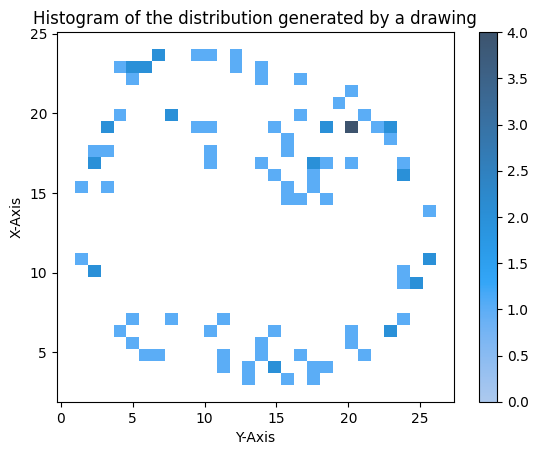

In [8]:
import bwb.plotters as plotters
import matplotlib.pyplot as plt

data_coords = face0.enumerate_support_()[data].cpu().numpy() + np.random.randn(100, 2) * 0.1
# data_coords = face0.enumerate_support_()[face0.sample((10_000,))].cpu().numpy() + np.random.randn(10_000, 2) * 0.1

plotters.plot_histogram_from_points(data_coords, rotate=True, histplot_kwargs=dict(bins=28))
plt.show()

In [9]:
data_5 = data[:5]
data_50 = data[:50]
data_100 = data[:100]
data_coords_5 = data_coords[:5]
data_coords_50 = data_coords[:50]
data_coords_100 = data_coords[:100]

In [10]:
max_images = 3 * 13
expl_posterior = ExplicitPosteriorSampler()
expl_posterior.fit(data=data_5, models=faces)
expl_posterior.rvs(1_000, seed=42)

print(f"Total time: {expl_posterior.total_time:.2f} seconds")

expl_posterior

Total time: 0.38 seconds


ExplicitPosteriorSampler(n_data=5, n_models=161666, n_support=4215, samples=1000)

2024-04-19 20:05:02,351: WARNING [bwb.plotters:56]
> The number of images is less than the number of rows times the number of columns.
/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/bwb/plotters.py:113: UserWarning: The number of images is less than the number of rows times the number of columns.
  return plot_list_of_images(


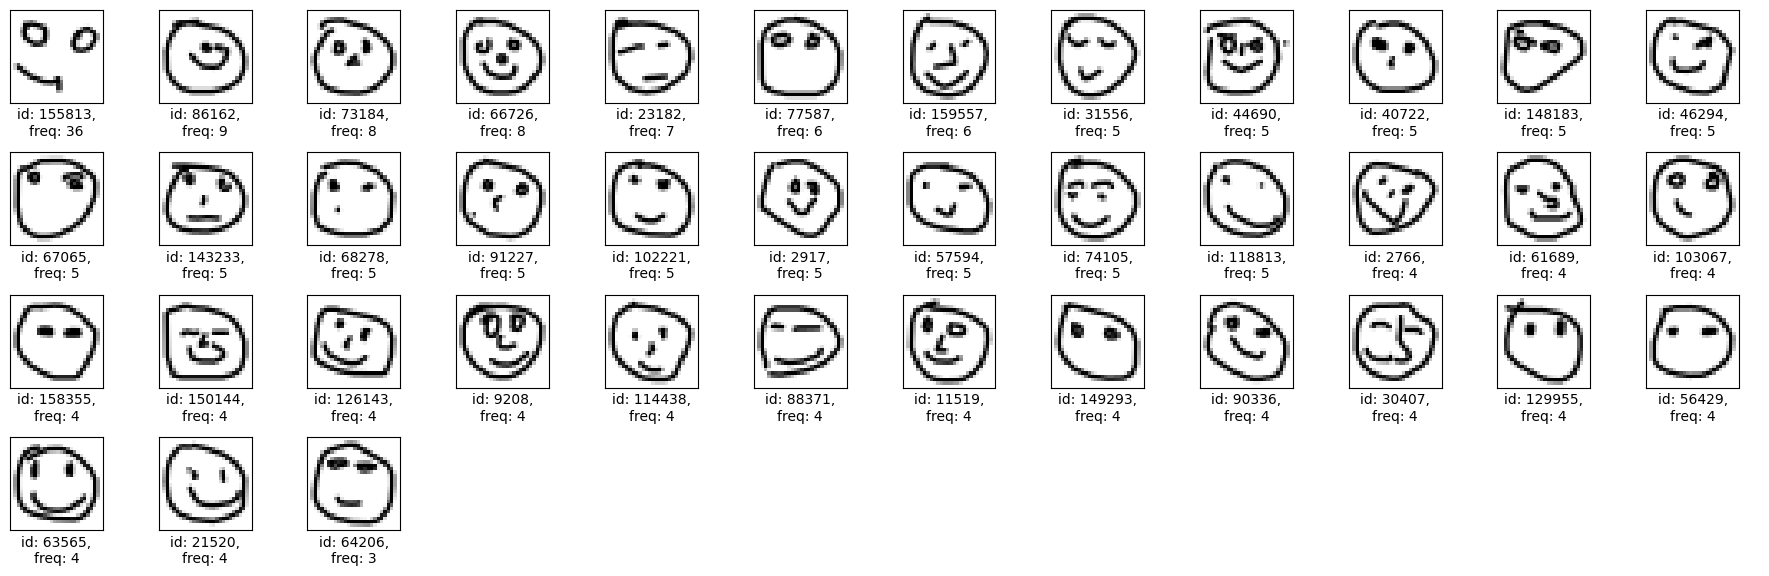

In [11]:
import bwb.utils as utils
most_common = [faces[i] for i, _ in expl_posterior.samples_counter.most_common(max_images)]
plotters.plot_list_of_draws(
    most_common,
    labels=utils.freq_labels_dist_sampler(expl_posterior), cmap="binary_r",
)
print()

Total time: 0.13 seconds


2024-04-19 20:05:07,388: WARNING [bwb.plotters:56]
> The number of images is less than the number of rows times the number of columns.


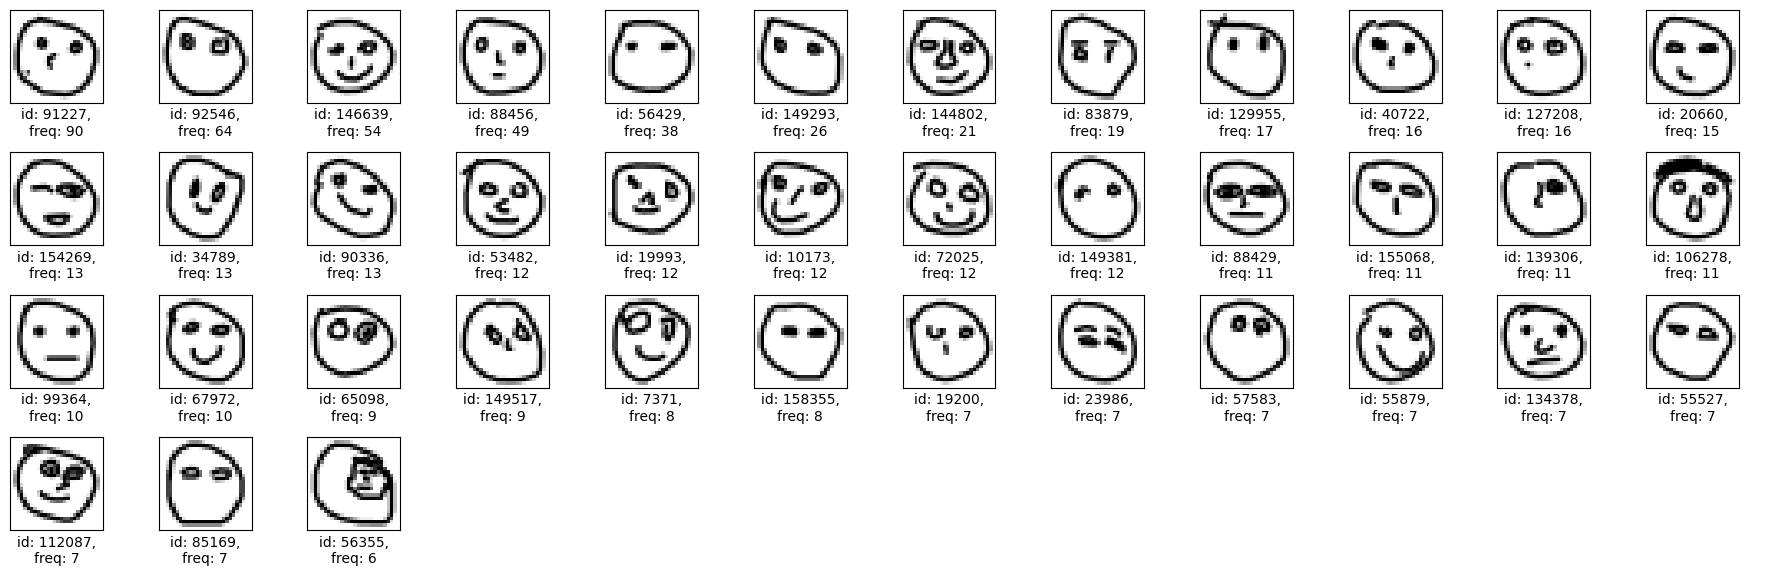

In [12]:
max_images = 3 * 13
expl_posterior = ExplicitPosteriorSampler()
expl_posterior.fit(data=data[:10], models=faces)
expl_posterior.rvs(1_000, seed=42)
print(f"Total time: {expl_posterior.total_time:.2f} seconds")
most_common = [faces[i] for i, _ in expl_posterior.samples_counter.most_common(max_images)]
plotters.plot_list_of_draws(
    most_common,
    labels=utils.freq_labels_dist_sampler(expl_posterior),
)
print()

Total time: 0.04 seconds


2024-04-19 20:05:09,159: WARNING [bwb.plotters:56]
> The number of images is less than the number of rows times the number of columns.


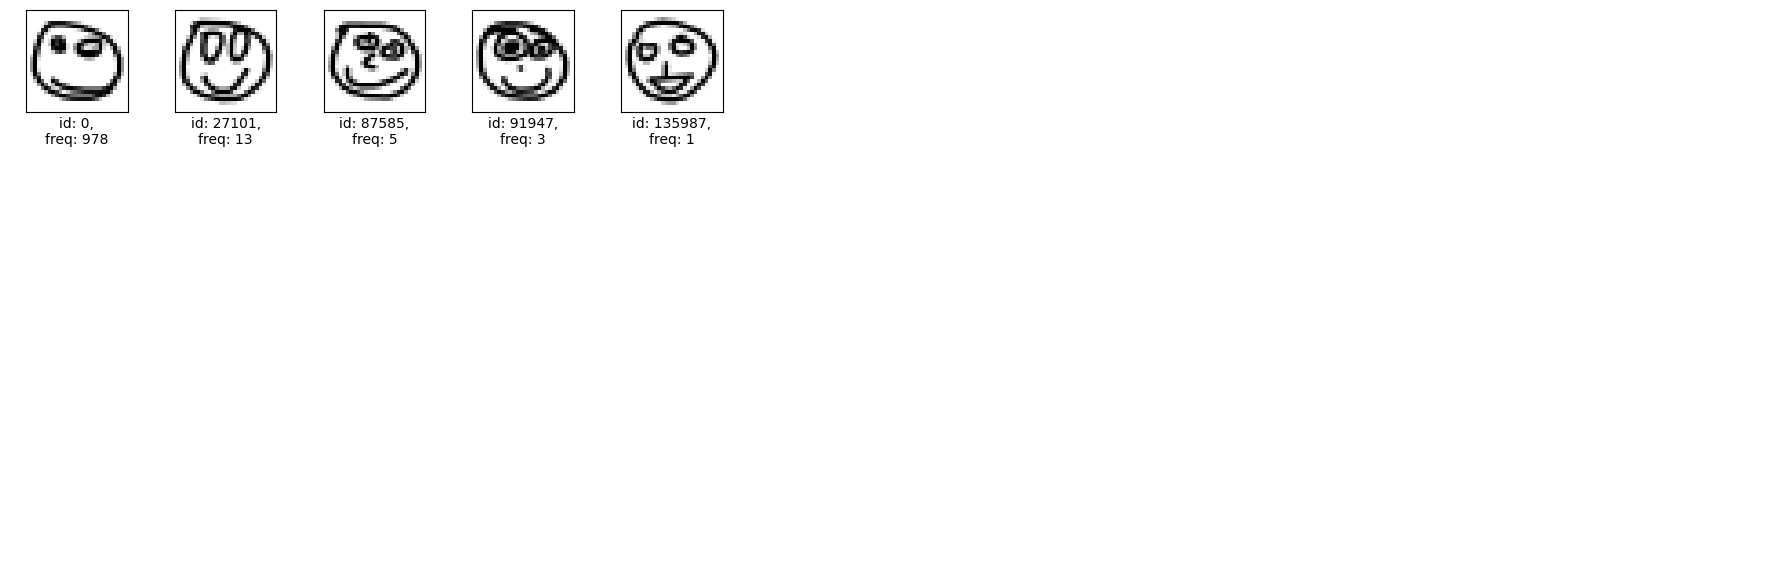

In [13]:
max_images = 3 * 13
expl_posterior = ExplicitPosteriorSampler()
expl_posterior.fit(data=data[:20], models=faces)
expl_posterior.rvs(1_000, seed=42)
print(f"Total time: {expl_posterior.total_time:.2f} seconds")
most_common = [faces[i] for i, _ in expl_posterior.samples_counter.most_common(max_images)]
plotters.plot_list_of_draws(
    most_common,
    labels=utils.freq_labels_dist_sampler(expl_posterior),
)
print()

2024-04-19 20:05:10,577: WARNING [bwb.plotters:56]
> The number of images is less than the number of rows times the number of columns.


Total time: 0.62 seconds


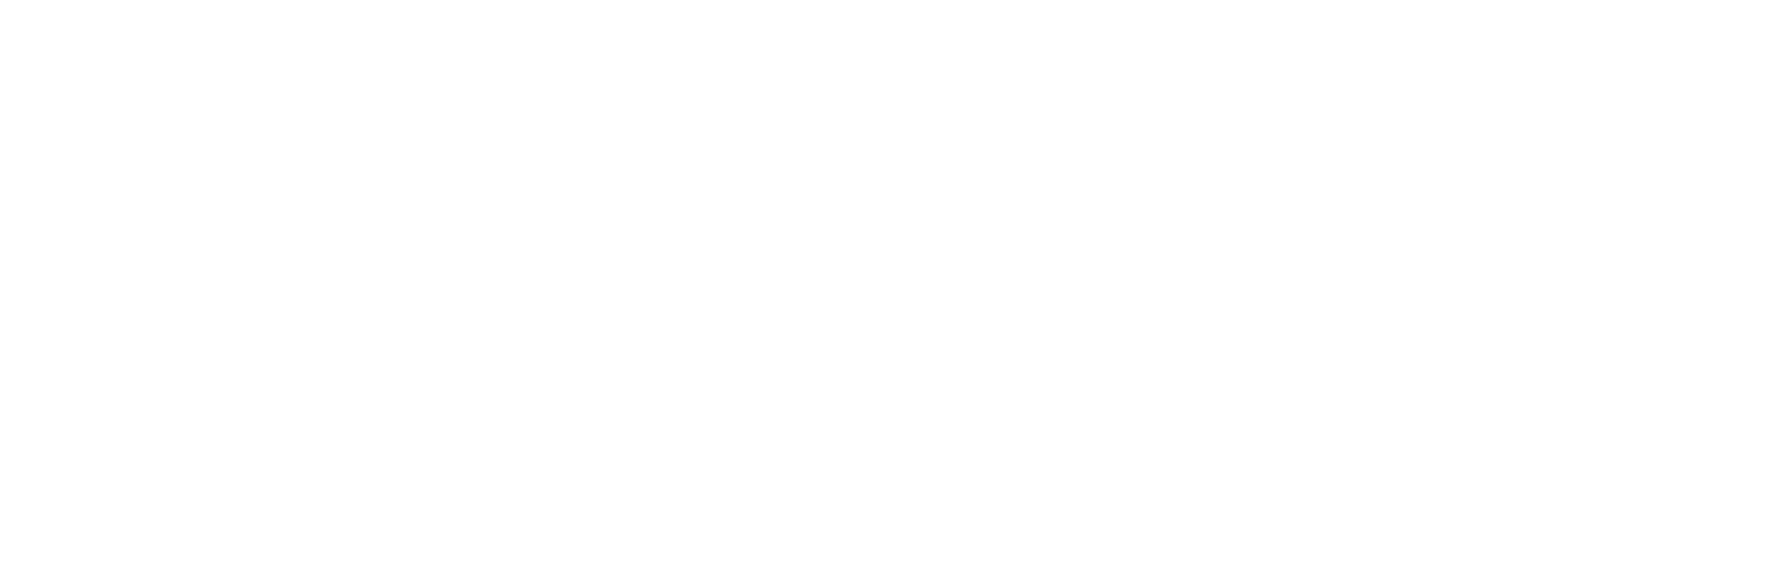

UniformDiscreteSampler(n_models=161666, samples=0)

In [14]:
from bwb.distributions.distribution_samplers import UniformDiscreteSampler

max_images = 3 * 13
uniform_sampler = UniformDiscreteSampler()
uniform_sampler.fit(models=faces)
uniform_sampler.rvs(1_000, seed=42)
print(f"Total time: {uniform_sampler.total_time:.2f} seconds")
most_common = [faces[i] for i, _ in uniform_sampler.samples_counter.most_common(max_images)]
plotters.plot_list_of_draws(
    most_common,
    labels=utils.freq_labels_dist_sampler(uniform_sampler),
)
uniform_sampler

In [15]:
old_dict = dict(a=1, b=2)
old_dict.setdefault("c", 2)
new_dict = dict(a=2, c=4)
old_dict.update(new_dict)
old_dict

{'a': 2, 'b': 2, 'c': 4}

In [16]:
from quick_torch import QuickDraw
import torchvision.transforms.v2 as T
from pathlib import Path
# noinspection PyProtectedMember
from bwb.utils import array_like_t
from torch.utils.data import DataLoader
from bwb.config import config
import multiprocessing as mp
import bwb.distributions as dist
from bwb.distributions.models import BaseDiscreteWeightedModelSet

ds = QuickDraw(
    Path("./data"),
    categories="face",
    download=True,
    transform=T.Compose(
        [
            T.ToTensor(),
            T.Lambda(lambda x: x.squeeze()),
        ]
    )
)


# noinspection PyMethodOverriding,PyShadowingNames
class DatasetWrapper(BaseDiscreteWeightedModelSet):
    def __init__(self, dataset, dataloader_args=None, device=None, dtype=None, eps=None):
        self.dataset = dataset

        self.dataloader_args = dataloader_args or dict()
        default_args = dict(batch_size=1024, shuffle=False, num_workers=mp.cpu_count())
        for key, value in default_args.items():
            self.dataloader_args.setdefault(key, value)

        self.device = torch.device(device or config.device)
        # If we are working in cuda
        if self.device.type == "cuda":
            self.dataloader_args.setdefault("pin_memory", True)

        self.dtype = dtype or config.dtype

        self.eps = eps or config.eps

    def __len__(self):
        return len(self.dataset)

    def compute_likelihood(self, data: array_like_t, **kwargs) -> torch.Tensor:
        dataloader = DataLoader(self.dataset, **self.dataloader_args)
        data = torch.as_tensor(data, device=self.device).reshape(1, -1)

        likelihoods = []

        for features, _ in dataloader:
            # Transfer the features to the appropriate device
            features = torch.as_tensor(features, device=self.device, dtype=self.dtype)
            # Flatten the features
            features = features.reshape(features.size(0), -1)
            # Normalize the features
            features = features / features.sum(dim=1, keepdim=True)
            # Compute the log of the features
            features = torch.log(features + self.eps)
            # Compute the likelihood
            evaluations = torch.take_along_dim(features, data, 1)
            likelihood = torch.exp(evaluations.sum(dim=1))

            likelihoods.append(likelihood)

        likelihood_cache = torch.cat(likelihoods, dim=0)

        probabilities = likelihood_cache / (likelihood_cache.sum() + self.eps)

        return probabilities

    def get(self, i: int, **kwargs) -> dist.DistributionDraw:
        return dist.DistributionDraw.from_grayscale_weights(self.dataset[i][0])


ds_wrapped = DatasetWrapper(ds)

ds_wrapped.get(1)
ds_wrapped.compute_likelihood(data)

/home/fmunoz/.cache/pypoetry/virtualenvs/bayesian-learning-with-wasserstein-barycen-kx0bNH_v-py3.12/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


tensor([4.4149e-223,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00], device='cuda:0', dtype=torch.float64)

2024-04-19 20:05:19,163: WARNING [bwb.plotters:56]
> The number of images is less than the number of rows times the number of columns.


Total time: 3.83 seconds
Total time: 3.84 seconds


/home/fmunoz/codeProjects/pythonProjects/Bayesian-Learning-with-Wasserstein-Barycenters/bwb/plotters.py:113: UserWarning: The number of images is less than the number of rows times the number of columns.
  return plot_list_of_images(


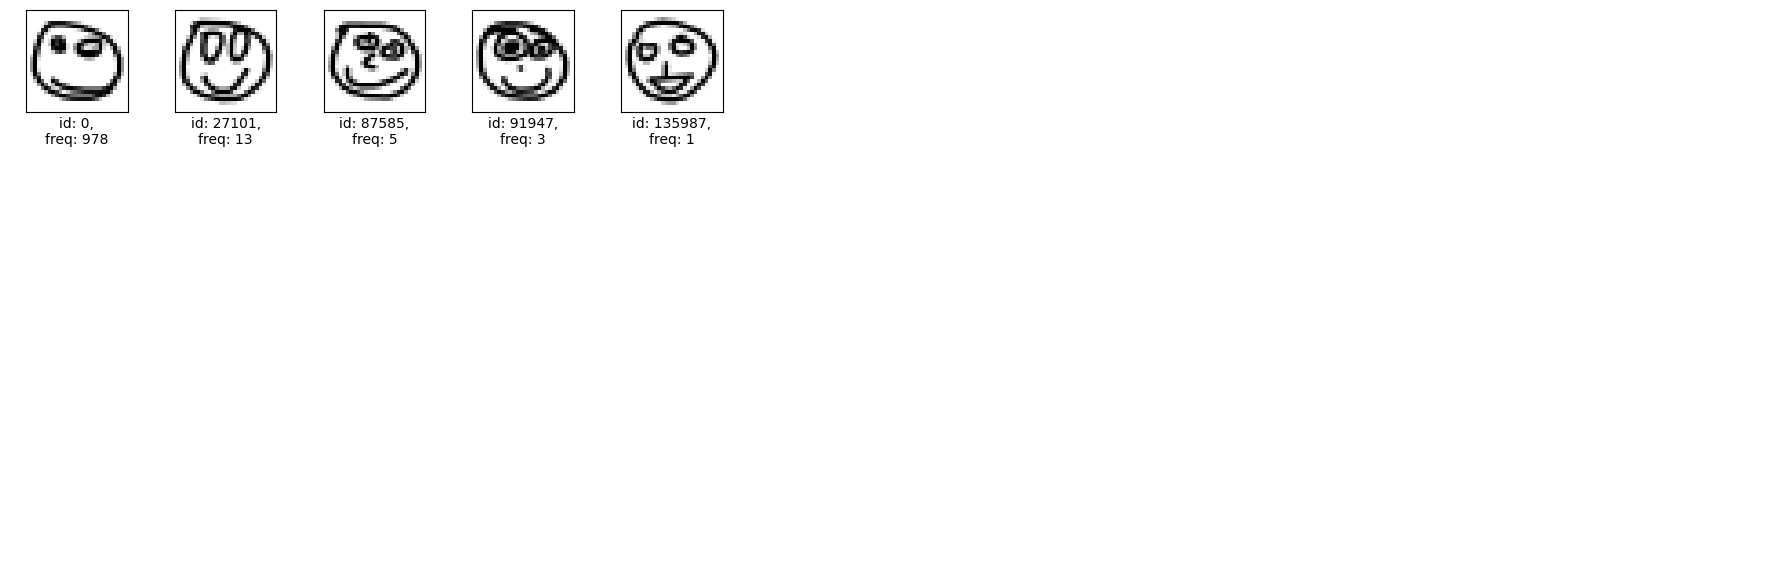

In [17]:
max_images = 3 * 13
expl_posterior = ExplicitPosteriorSampler(save_samples=True)
expl_posterior.fit(data=data[:20], models=ds_wrapped)
print(f"Total time: {expl_posterior.total_time:.2f} seconds")
expl_posterior.rvs(1_000, seed=42)
print(f"Total time: {expl_posterior.total_time:.2f} seconds")
most_common = [faces[i] for i, _ in expl_posterior.samples_counter.most_common(max_images)]
plotters.plot_list_of_draws(
    most_common,
    labels=utils.freq_labels_dist_sampler(expl_posterior),
)
print()

In [18]:
expl_posterior.models_.get(0)

In [19]:
%%time
expl_posterior.fit(data=data, models=faces)

CPU times: user 129 ms, sys: 9.34 ms, total: 138 ms
Wall time: 137 ms


ExplicitPosteriorSampler(n_data=100, n_models=161666, n_support=1, samples=1000)

In [20]:
%%time
expl_posterior.rvs(size=1000, seed=42)
print()


CPU times: user 7.79 ms, sys: 776 µs, total: 8.56 ms
Wall time: 6.25 ms


In [21]:
expl_posterior.total_time

3.9827911729953485

In [22]:
expl_posterior2 = ExplicitPosteriorSampler()
expl_posterior2.total_time, expl_posterior.total_time

(0.0, 3.9827911729953485)

In [23]:
try:
    expl_posterior2.draw()
except Exception as e:
    print(e)

This ExplicitPosteriorSampler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [24]:
len(expl_posterior.samples_counter)

5

In [25]:
print(expl_posterior.samples_counter.total())
expl_posterior.draw()
print(expl_posterior.samples_counter.total())

2000
2001


In [26]:
expl_posterior.draw()

In [27]:
del expl_posterior, expl_posterior2, faces, models_array

# Importar redes

In [28]:
from wgan_gp.wgan_gp_vae.model_resnet import Generator, Encoder, LatentDistribution
import torch
from wgan_gp.wgan_gp_vae.utils import load_checkpoint


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

NOISE = "norm"
LATENT_DIM = 128
CHANNELS_IMG = 1
NUM_FILTERS = [256, 128, 64, 32]

noise_sampler = LatentDistribution(NOISE, LATENT_DIM, device)

CURR_PATH = Path(".")
NETS_PATH = CURR_PATH / "wgan_gp" / "networks" 

DS_NAME = "data"

G = Generator(LATENT_DIM, CHANNELS_IMG, latent_distr=NOISE).to(device)
E = Encoder(LATENT_DIM, CHANNELS_IMG).to(device)

FACE_PATH = NETS_PATH / f"cleaned_{DS_NAME}_zDim{LATENT_DIM}_{NOISE}_bs_128"

load_checkpoint(G, FACE_PATH, "generator", device)
load_checkpoint(E, FACE_PATH, "encoder", device)

G.eval(); E.eval()
print()

In [29]:
noise_sampler

LatentDistribution(name=norm, z_dim=128, device=cuda)

torch.float64


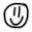

In [30]:
from bwb.distributions import DistributionDraw
from torchvision import disable_beta_transforms_warning
disable_beta_transforms_warning()

import torchvision.transforms.v2 as T


z = noise_sampler(1)
m = G(z)

transform_in = T.Compose([
    T.Lambda(lambda x: x / torch.max(x)),
    T.ToPILImage(),
    T.Resize(32),
    T.ToImage(),
    T.ConvertImageDtype(torch.float32),
    T.Normalize((0.5,), (0.5,)),
])

transform_out_ = T.Compose([
    T.ToDtype(torch.float64),
    T.Lambda(lambda x: x.squeeze()),
    T.Lambda(lambda x: x - torch.min(x)),
    T.Lambda(lambda x: x / torch.sum(x)),
    # T.Lambda(lambda x: DistributionDraw.from_grayscale_weights(x)),
])

transform_out = T.Compose([
    transform_out_,
    T.Lambda(lambda x: DistributionDraw.from_grayscale_weights(x)),
])

out: DistributionDraw = transform_out(m)
print(out.dtype)
out

In [31]:
torch.device("cuda" if torch.cuda.is_available() else "cpu")

device(type='cuda')

In [32]:
from bwb.distributions.distribution_samplers import GeneratorDistribSampler

distr_sampler = GeneratorDistribSampler()
distr_sampler.fit(G, transform_out_, noise_sampler)
distr_sampler.transform_noise(z)
distr_sampler.rvs(3)

[DistributionDraw(shape: torch.Size([32, 32])),
 DistributionDraw(shape: torch.Size([32, 32])),
 DistributionDraw(shape: torch.Size([32, 32]))]

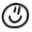

In [33]:
distr_sampler.draw()

seed = 4102165607616432379
data = tensor([355, 580, 791, 840, 778, 826, 541, 821, 772, 342, 309, 211, 842, 375,
        387, 715, 168, 248, 793, 515, 761, 426, 852, 228, 514, 337, 451, 850,
        439, 427, 439, 773, 309, 818, 878, 701, 260, 790, 295, 173, 361, 432,
        843, 427, 482, 514, 746, 140, 821, 746, 876, 709, 300, 822, 342, 393,
        197, 743, 481, 854, 709, 339, 781, 402, 259, 387, 433, 577, 876, 213,
        675, 914, 699, 278, 364, 822, 546, 338, 210, 573, 396, 342, 404, 336,
        790, 328, 916, 138, 172, 331, 794, 341, 309, 730, 338, 780, 884, 508,
        845, 380], device='cuda:0')


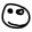

In [34]:


seed = 4102165607616432379
print(f"{seed = }")
torch.manual_seed(seed)

with torch.no_grad():
    m = transform_in(face0.grayscale_weights).unsqueeze(0).to(device)
    z = E(m)
    m = G(z)

face = transform_out(m)

# face = bwb_dist.DistributionDraw.from_grayscale_weights(m)
data = face.sample((100,))
print(f"{data = }")
face

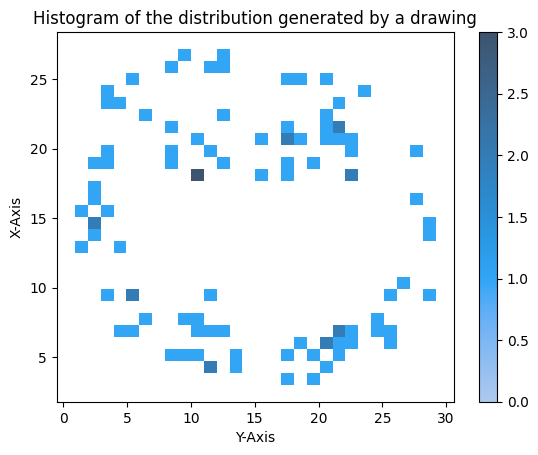

In [35]:
shape = face.shape
data_coords = face.enumerate_support_()[data].cpu().numpy() + np.random.randn(len(data), 2) * 0.1

plotters.plot_histogram_from_points(data_coords, rotate=True, shape=shape, histplot_kwargs=dict(bins=28))
plt.show()

# MCMC

![](https://quicklatex.com/cache3/e9/ql_ee61247290f642a5afc1fc6205cc98e9_l3.png)

Realizaremos MCMC utilizando la librería pyro

In [36]:

# from pyro.infer.mcmc import NUTS, MCMC

In [37]:
# DEV = "cpu"
# means1 = torch.tensor([-5, 5], device=DEV)
# means2 = -means1
# 
# ndim = means1.size(0)
# cov = torch.eye(ndim, device=DEV) * 5
# 
# # @torch.jit.script
# def prob(
#     params: dict[str, torch.Tensor],
#     means1: torch.Tensor = means1,
#     means2: torch.Tensor = means2,
#     cov: torch.Tensor = cov,
#     const: torch.Tensor = torch.tensor(0.7),
# ):
#     x = params["x"]
#     diff1 = x - means1
#     log_prob1 = 0.5 * torch.dot(diff1, torch.linalg.solve(cov, diff1))
# 
#     diff2 = x - means2
#     log_prob2 = 0.5 * torch.dot(diff2, torch.linalg.solve(cov, diff2))
#     return -torch.log(const * torch.exp(-log_prob1) + (1-const) * torch.exp(-log_prob2))
# 
# prob({"x": torch.zeros((ndim,), device=DEV)})

In [38]:
# nwalkers = 2
# p0 = torch.randn((nwalkers, ndim), device=DEV)
# p0.shape

In [39]:
# prob({"x": p0[0]})

In [40]:
# kernel = NUTS(
#     potential_fn=prob,
#     jit_compile=True,
#     target_accept_prob=0.6,
#     # full_mass=True,
# )

In [41]:
# mcmc = MCMC(kernel, warmup_steps=1000, num_samples=10_000, initial_params={"x": p0}, num_chains=nwalkers)

In [42]:
# mcmc.run(means1, means2, cov)

In [43]:
# mcmc.diagnostics()

In [44]:
# mcmc.summary()

In [45]:
# samples = mcmc.get_samples()["x"]
# samples.shape

In [46]:
# import matplotlib.pyplot as plt
# 
# samples_ = samples.cpu()
# plt.hist(samples_[:, 0], 100, color="k", histtype="step")
# plt.xlabel(r"$\theta_1$")
# plt.ylabel(r"$p(\theta_1)$")
# plt.gca().set_yticks([]);

In [47]:
# import seaborn as sns
# x = samples[:, 0].cpu()
# y = samples[:, 1].cpu()
# g = sns.jointplot(x=x, y=y, alpha=0.1)
# g.plot_joint(sns.kdeplot, color="r")
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [48]:
# @torch.jit.script
def log_prior(
    z,
) -> torch.Tensor:
    """
    Corresponds to the log prior of a Normal(z; 0, 1) distribution.
    :param params: 
    :return: 
    """
    z = z.squeeze()
    z_2 = z ** 2
    return 0.5 * torch.sum(z_2)
    
# log_prior = torch.jit.script(_log_prior, example_inputs=[({"z": noise_sampler(1)},)])
    
log_prior(noise_sampler(1))

tensor(64.0571, device='cuda:0')

In [49]:
def log_likelihood_latent(
    z,
    data = data,
    generator = G,
    transform_out = transform_out_,
):
    eps = torch.finfo(z.dtype).eps

    z = torch.reshape(z, (1, -1, 1, 1))
    with torch.no_grad():
        m = generator(z)
    m = transform_out(m)
    m = m.reshape((-1,))

    m_data = m.take(data)
    # m_data_zeros = m_data == 0
    m_data = m_data + eps  # to avoid log(0)
    logits = torch.log(m_data)  # log m(x_i)
    # logits[m_data_zeros] = logits[m_data_zeros] * 3

    return torch.sum(logits)  # \sum_{i=1}^n \log m(x_i)

# log_likelihood_latent = torch.jit.script(_log_likelihood_latent, example_inputs=[({"z": noise_sampler(1)}, data, G, transform_out_)])

log_likelihood_latent(
    noise_sampler(1),
    data,
    G,
    transform_out_
)

tensor(-809.2136, device='cuda:0', dtype=torch.float64)

In [50]:
def log_posterior(
    z,
    data = data,
    generator = G,
    transform_out = transform_out_,
):
    return log_prior(z) + log_likelihood_latent(z, data, generator, transform_out)

log_posterior(
    noise_sampler(1),
    data,
    G,
    transform_out_
)

tensor(-721.8729, device='cuda:0', dtype=torch.float64)

In [51]:
# nwalkers = 2
# z0 = noise_sampler(nwalkers).squeeze()
# z0.shape

In [52]:
# kernel = NUTS(
#     potential_fn=log_posterior,
#     # jit_compile=True,
#     target_accept_prob=0.6,
# )

In [53]:
# mcmc = MCMC(
#     kernel,
#     warmup_steps=1_000,
#     num_samples=10_000,
#     initial_params={"z": z0},
#     num_chains=nwalkers,
#     mp_context="spawn"
# )

In [54]:
# mcmc.run()

In [55]:
# z = noise_sampler(1).squeeze()
# z_abs = torch.abs(z)
# constraint = torch.maximum(z_abs - 1, torch.zeros_like(z_abs))
# penalizations = 1e6 * constraint ** 2
# constraint, penalizations.sum()

In [56]:
# import typing as t
# 
# 
# @torch.jit.script
# def _log_prior_unif(z: torch.Tensor, radius=torch.tensor(1), penalizaton=torch.tensor(1e6)):
#     """
#     Compute the log-prior of the latent variable z. The prior is uniform [-1, 1].
#     """
#     z = z.squeeze()
#     z_abs = torch.abs(z)
#     constraint = torch.maximum(z_abs - radius, torch.zeros_like(z_abs))
#     penalizations = penalizaton * constraint ** 2
#     return -torch.sum(penalizations)
# 
# 
# @torch.jit.script
# def _log_prior_norm(z: torch.Tensor, radius=torch.tensor(3), penalizaton=torch.tensor(1e6)):
#     """
#     Compute the log-prior of the latent variable z.
#     """
#     z = z.squeeze()
#     # min_value = torch.finfo(z.dtype).min
#     norm_z_2 = torch.sum(z ** 2)  # \|z\|^2
#     n = z.shape[0]
#     constraint = torch.maximum(norm_z_2 / n - radius ** 2, torch.zeros_like(norm_z_2))
#     penalizations = penalizaton * constraint ** 2
#     return -norm_z_2 / 2 - penalizations  # -\frac{1}{2} \|z\|^2
# 
# 
# # @torch.jit.script
# def _log_prior(z: torch.Tensor, G, radius=torch.tensor(1), penalizaton=torch.tensor(1e6)):
#     """
#     Compute the log-prior of the latent variable z.
#     """
#     if G._latent_distr(1).name == "unif":
#         return _log_prior_unif(z, radius, penalizaton)
#     elif G._latent_distr(1).name == "norm":
#         return _log_prior_norm(z, radius, penalizaton)
#     raise ValueError(f"unknown latent distribution {G._latent_distr(1).name}")
# 
# 
# # @torch.jit.script
# def _log_likelihood_latent(z: torch.Tensor, data: torch.Tensor, generator: torch.jit.ScriptModule, transform_out: t.Callable[[torch.Tensor], torch.Tensor]):
#     """
#     Compute the log-likelihood of the data given the latent variable z.
#     This is done by first generating the image x from z, then transforming it to a DistributionDraw object.
#     
#     The original likelihood is:
#     .. math::
#         \Pi_n(dm)
#         \propto \Pi(dm) \mathcal{L}_n(m)
#         = \int_{\mathcal{Z}} P_Z(dz) \Pi(dm | z) \mathcal{L}_n(m)
#         \propto \int_{\mathcal{Z}} dz \Pi(dm | z) \mathcal{L}_n(m) e^{-\frac{1}{2} \|z\|^2}
#         = \int_{\mathcal{Z}} dz \Pi(dm | z) \prod_{i=1}^n m(x_i) e^{-\frac{1}{2} \|z\|^2}
# 
#     So, the log-likelihood with respecto to z is:
#     .. math::
#         \ell_n(z) = \sum_{i=1}^n \log m(x_i) - \frac{1}{2} \|z\|^2
#     """
#     eps = torch.finfo(z.dtype).eps
# 
#     z = torch.reshape(z, (1, -1, 1, 1))
#     with torch.no_grad():
#         m = generator(z)
#     m = transform_out(m)
#     m = m.reshape((-1,))
# 
#     # m_data = m.take(data) + eps  # to avoid log(0)
#     # logits = torch.log(m_data)  # log m(x_i)
# 
#     m_data = m.take(data)
#     # m_data_zeros = m_data == 0
#     m_data = m_data + eps  # to avoid log(0)
#     logits = torch.log(m_data)  # log m(x_i)
#     # logits[m_data_zeros] = logits[m_data_zeros] * 3
# 
#     return torch.sum(logits)  # \sum_{i=1}^n \log m(x_i)
# 
# 
# # @torch.jit.script
# def _log_posterior(
#     z: torch.Tensor,
#     data: torch.Tensor,
#     generator: torch.nn.Module,
#     transform_out,
#     radius=torch.tensor(1),
#     penalization=torch.tensor(1e6)
# ):
#     """
#     Compute the log-posterior of the latent variable z.
#     .. math::
#         \log \Pi_n(z) = \log \Pi_Z(z) + \log \Pi_n(dm)
#     """
#     return _log_prior_unif(z, radius, penalization) + _log_likelihood_latent(z, data, generator, transform_out)
# 
# 
# z = noise_sampler(1).squeeze()
# 
# _log_likelihood_latent(z, data, G, transform_out), _log_posterior(z, data, G, transform_out)

In [57]:
# @torch.jit.script
# def _log_likelihood_true_latent(z: torch.Tensor, data: torch.Tensor, generator: torch.nn.Module, transform_out):
#     """
#     Compute the log-likelihood of the data given the latent variable z.
#     This is done by first generating the image x from z, then transforming it to a DistributionDraw object.
#     
#     The original likelihood is:
#     .. math::
#         \Pi_n(dm)
#         \propto \Pi(dm) \mathcal{L}_n(m)
#         = \int_{\mathcal{Z}} P_Z(dz) \Pi(dm | z) \mathcal{L}_n(m)
#         \propto \int_{\mathcal{Z}} dz \Pi(dm | z) \mathcal{L}_n(m) e^{-\frac{1}{2} \|z\|^2}
#         = \int_{\mathcal{Z}} dz \Pi(dm | z) \prod_{i=1}^n m(x_i) e^{-\frac{1}{2} \|z\|^2}
# 
#     So, the log-likelihood with respecto to z is:
#     .. math::
#         \ell_n(z) = \sum_{i=1}^n \log m(x_i) - \frac{1}{2} \|z\|^2
#     """
#     eps = torch.finfo(z.dtype).eps
# 
#     z = torch.reshape(z, (1, -1, 1, 1))
#     with torch.no_grad():
#         m = generator(z)
#     m = transform_out(m)
#     m = m.reshape((-1,))
# 
#     m_data = m.take(data)
#     m_data_zeros = m_data == 0
#     m_data = m_data + eps  # to avoid log(0)
#     logits = torch.log(m_data)  # log m(x_i)
#     logits[m_data_zeros] = logits[m_data_zeros] * 10
# 
#     return torch.sum(logits)  # \sum_{i=1}^n \log m(x_i)
# 
# 
# _log_likelihood_true_latent(z, data, G, transform_out)

In [58]:
# for _ in range(10):
#     z = G.sample_noise(1).squeeze()
#     print(_log_likelihood_true_latent(z, data, G, transform_out), _log_prior(z), _log_posterior(z, data, G, transform_out))

## MCMC Clase Base

In [59]:


# from bwb.distributions import BaseGeneratorDistribSampler
# 
# 
# class BaseLatentMCMCPosteriorSampler(BaseGeneratorDistribSampler[DistributionDraw]):
#     def __init__(self):

## MCMC Clase Base

In [60]:
import torch
from hamiltorch import Sampler, Integrator, Metric

from bwb.distributions.posterior_samplers import BaseLatentMCMCPosteriorSampler as _LatentMCMCPosteriorPiN


_LatentMCMCPosteriorPiN()

BaseLatentMCMCPosteriorSampler()

## MCMC paralelo

In [61]:
from bwb.distributions.posterior_samplers import LatentMCMCPosteriorSampler as LatentMCMCPosteriorPiN


LatentMCMCPosteriorPiN(parallel=True), LatentMCMCPosteriorPiN(n_workers=2), LatentMCMCPosteriorPiN(n_walkers=2)

(LatentMCMCPosteriorSampler(parallel=True),
 LatentMCMCPosteriorSampler(n_workers=2),
 LatentMCMCPosteriorSampler(n_walkers=2))

## Nu-U-Turn-Sampler (NUTS)

In [65]:
burn = 5_000
num_samples = 500_000
n_walkers = 8

In [66]:
import bwb.utils as bwb_utils
from bwb.distributions.posterior_samplers import NUTSPosteriorSampler as NUTSPosteriorPiN

In [67]:
from pathlib import Path





if not NUTS_POSTERIOR_PATH.exists() or RUN_MCMC:
    post_pi_n = NUTSPosteriorPiN(
        n_walkers=n_walkers,
        num_steps_per_sample=1,
        burn=burn,
        desired_accept_rate=0.6,
    ).fit(
        G, transform_out_, noise_sampler, data[:100]
    ).run(
        n_steps=num_samples
    )
    post_pi_n.save(NUTS_POSTERIOR_PATH)
else:
    post_pi_n = NUTSPosteriorPiN.load(NUTS_POSTERIOR_PATH)

post_pi_n

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples       | Samples/sec
Final Adapted Step Size:  0.03788108751177788--- |   4989/505000 | 51.72       
0d:02:14:15 | 0d:00:00:00 | #################### | 505000/505000 | 62.69       
Acceptance Rate 0.70
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples       | Samples/sec
Final Adapted Step Size:  0.045045167207717896-- |   5000/505000 | 60.37       
0d:02:14:05 | 0d:00:00:00 | #################### | 505000/505000 | 62.77       
Acceptance Rate 0.67
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples       | Samples/sec
Final Adapted Step Size:  0.05693257227540016--- |   4992/505000 | 57.06       
0d:02:09:56 | 0d:00:00:00 | #################### | 505000/505000 | 64.78       
Acceptance Rate 0.59
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress        

NUTSPosteriorSampler(n_data=100, n_total_iterations=500000, n_walkers=8)

In [ ]:
mean_autocorr_time = int(post_pi_n.get_autocorr_time().mean())
print(mean_autocorr_time)

In [65]:
post_pi_n.shuffle_samples_cache(thin=int(mean_autocorr_time / 10))

NUTSPosteriorSampler(n_data=100, n_total_iterations=50000, n_cached_samples=2280, n_walkers=8)

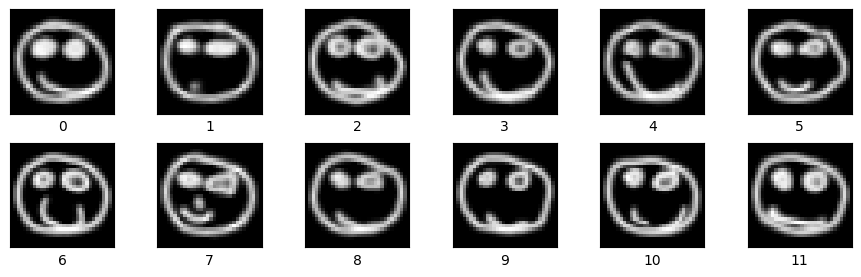

In [66]:
max_images = 12
plotters.plot_list_of_draws(post_pi_n_.rvs(max_images), n_rows=2, n_cols=6)
print()

In [67]:
post_pi_n

NUTSPosteriorSampler(n_data=100, n_total_iterations=50000, n_cached_samples=2268, n_walkers=8)

In [68]:
from wgan_gp.wgan_gp_vae.utils import ProjectorOnManifold
import torchvision.transforms as T

transform_in_proj = T.Compose([
    # From pdf to grayscale
    T.Lambda(lambda x: x / torch.max(x)),
    T.ToPILImage(),
    T.Resize((32, 32)),
    T.ToTensor(),
    T.Normalize(
        [0.5 for _ in range(1)],
        [0.5 for _ in range(1)],
    ),
])

transform_out_proj = T.Compose([
    # Ensure the range is in [0, 1]
    T.Lambda(lambda x: x - torch.min(x)),
    T.Lambda(lambda x: x / torch.max(x)),
    T.Lambda(lambda x: x / torch.sum(x)),
    T.Lambda(lambda x: x.squeeze(0)),
])

proj = ProjectorOnManifold(
    E, G, 
    transform_in=transform_in_proj,
    transform_out=transform_out_proj,
)

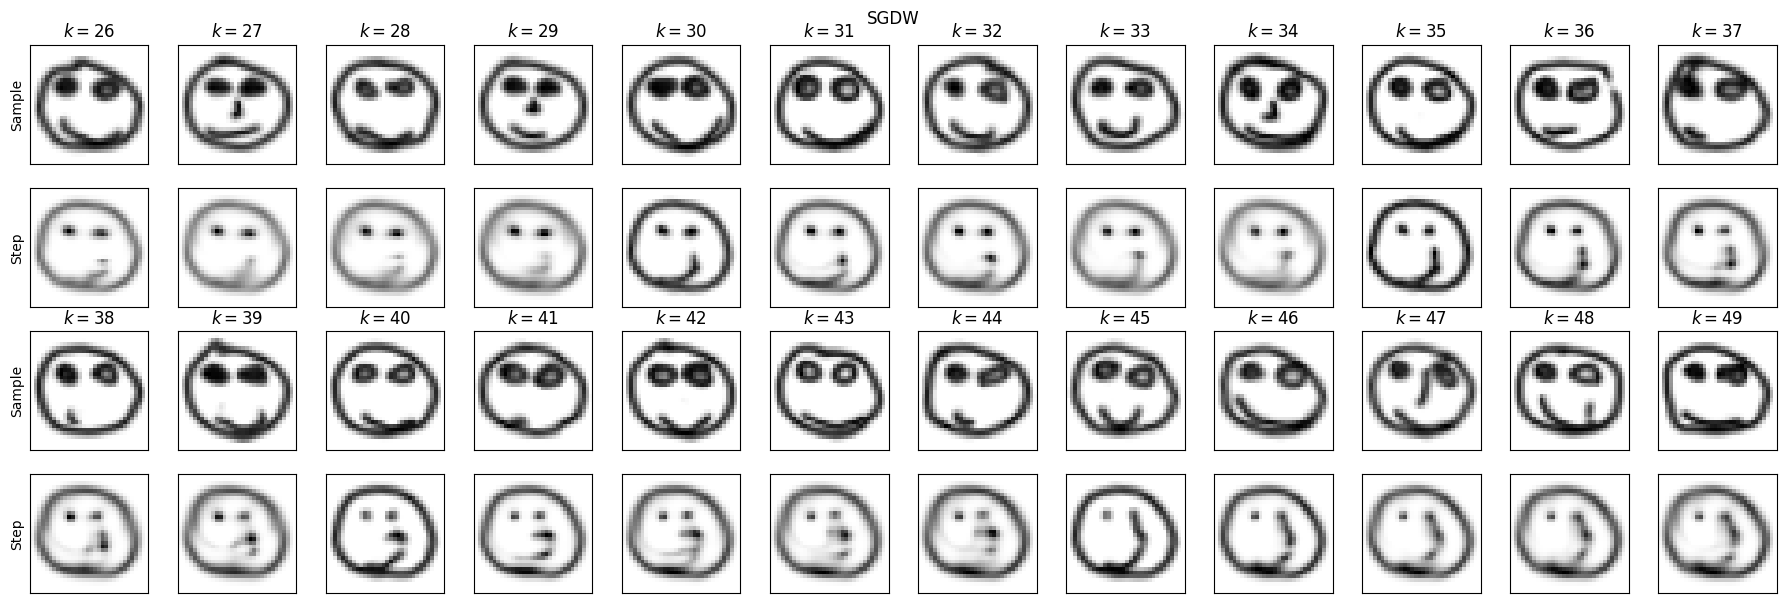

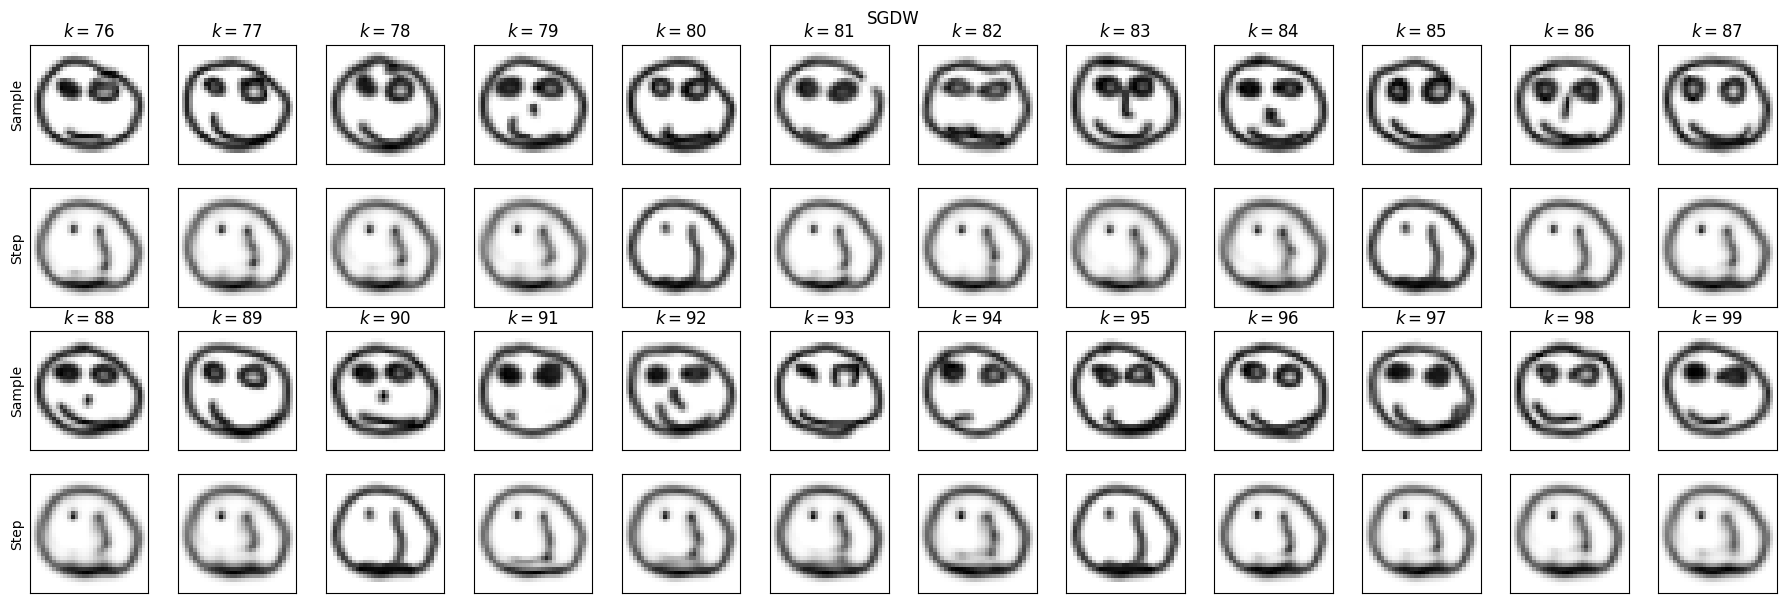

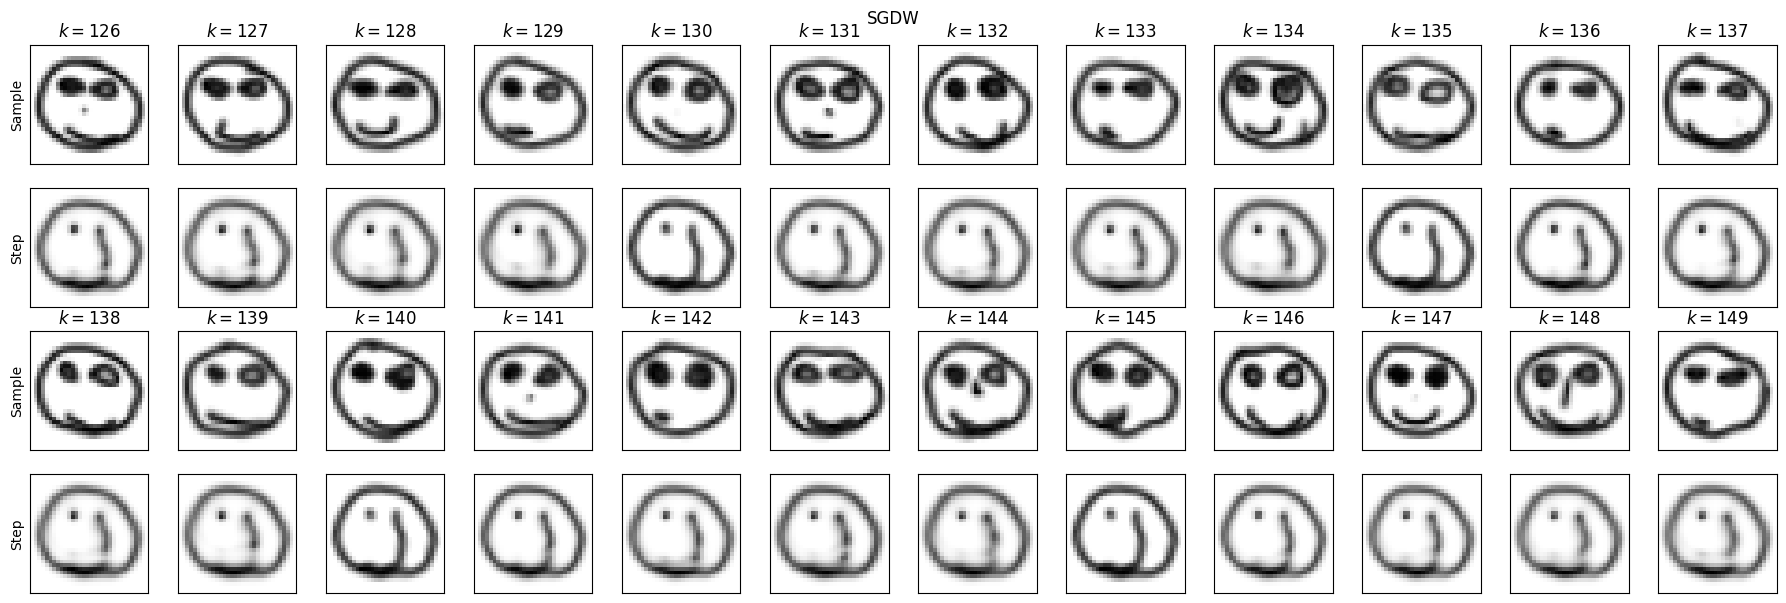

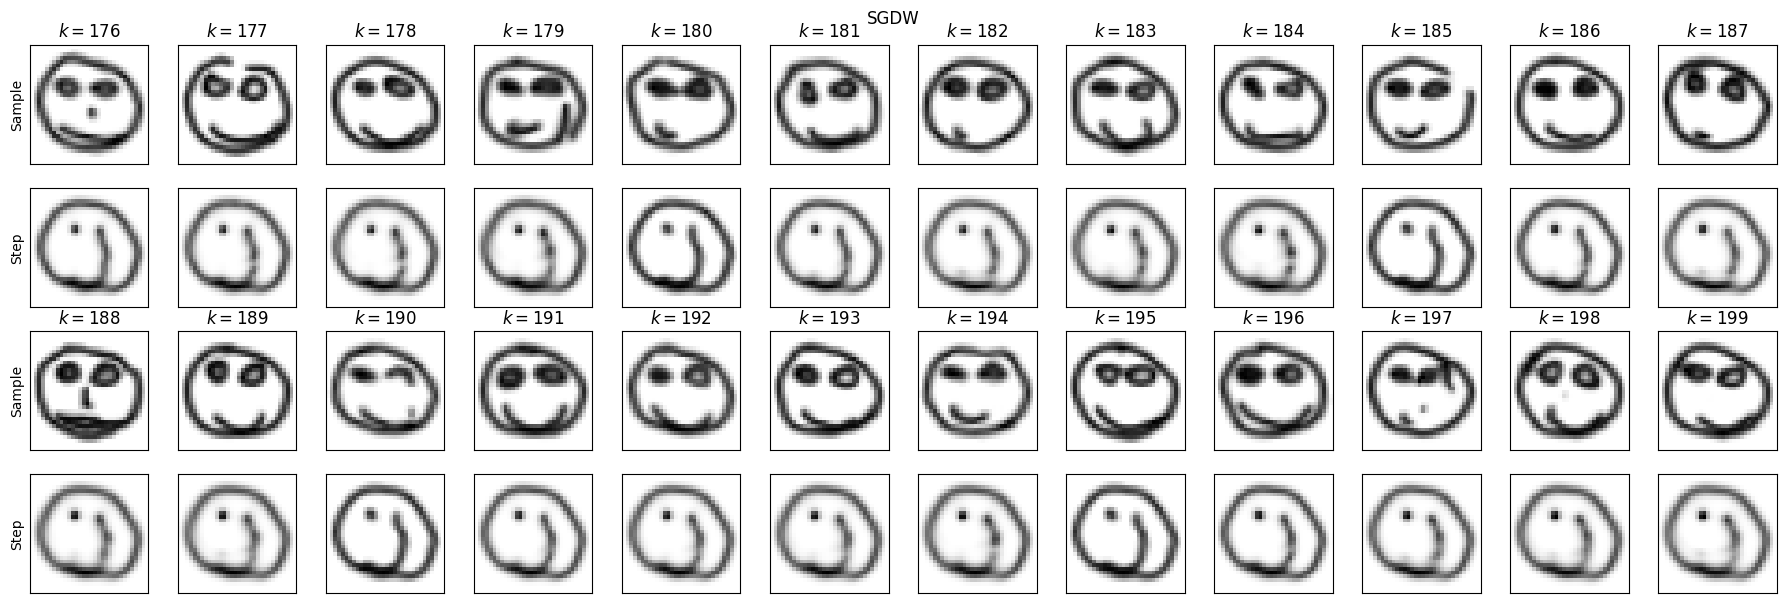

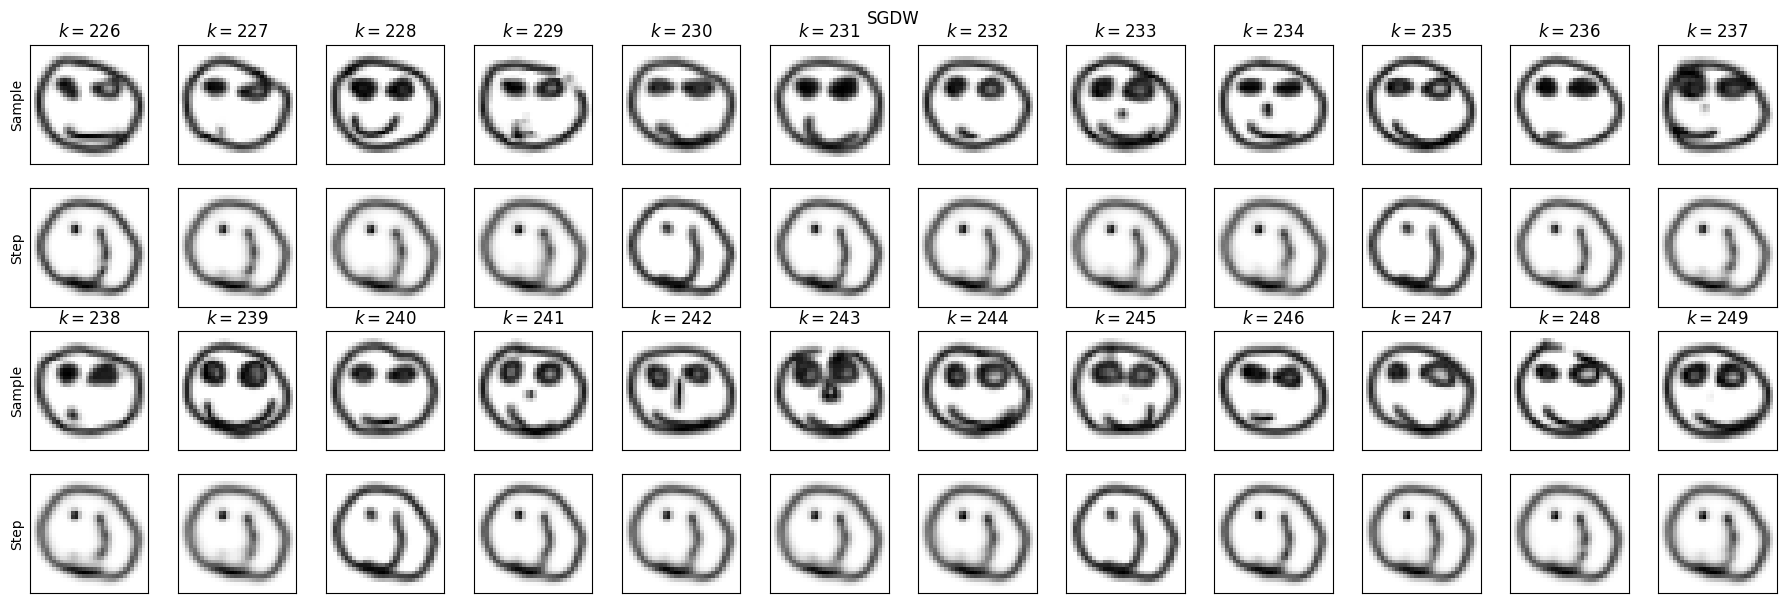

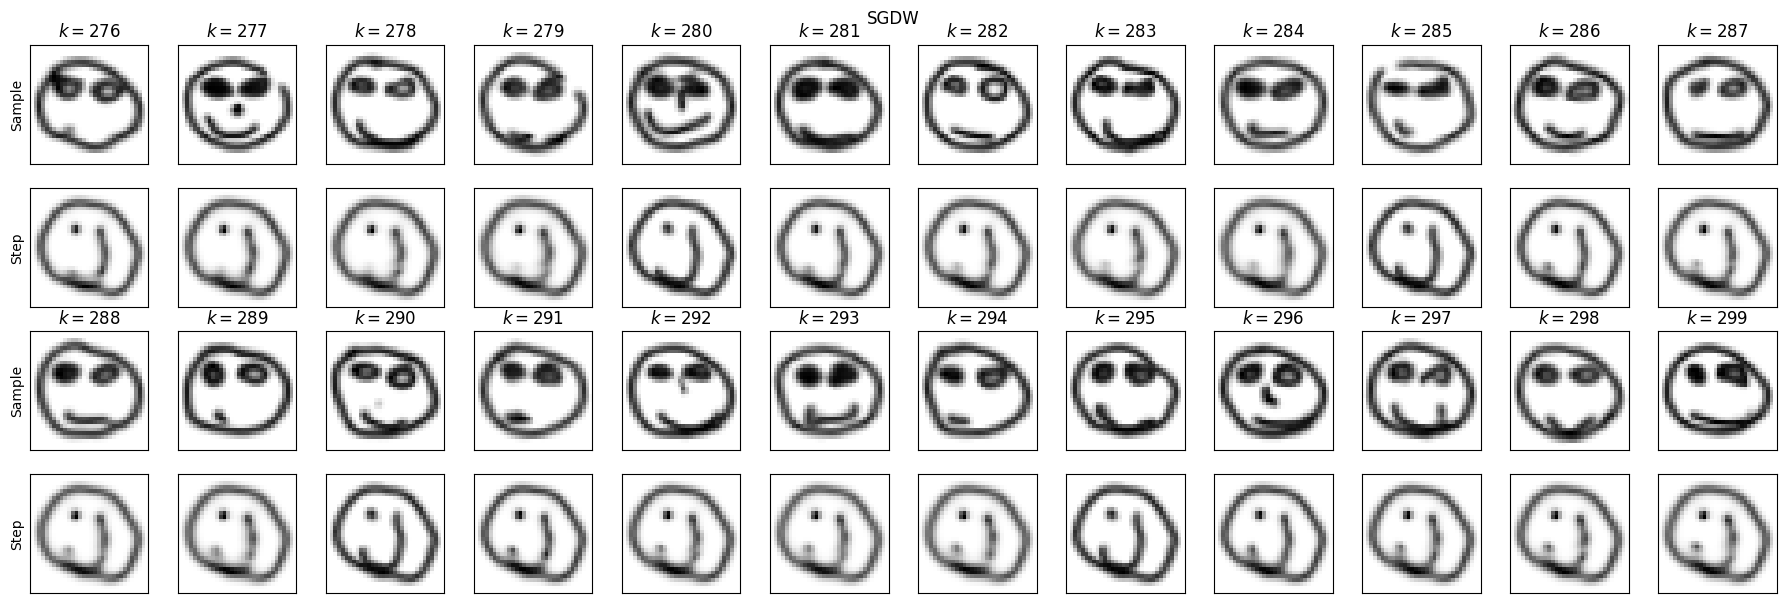

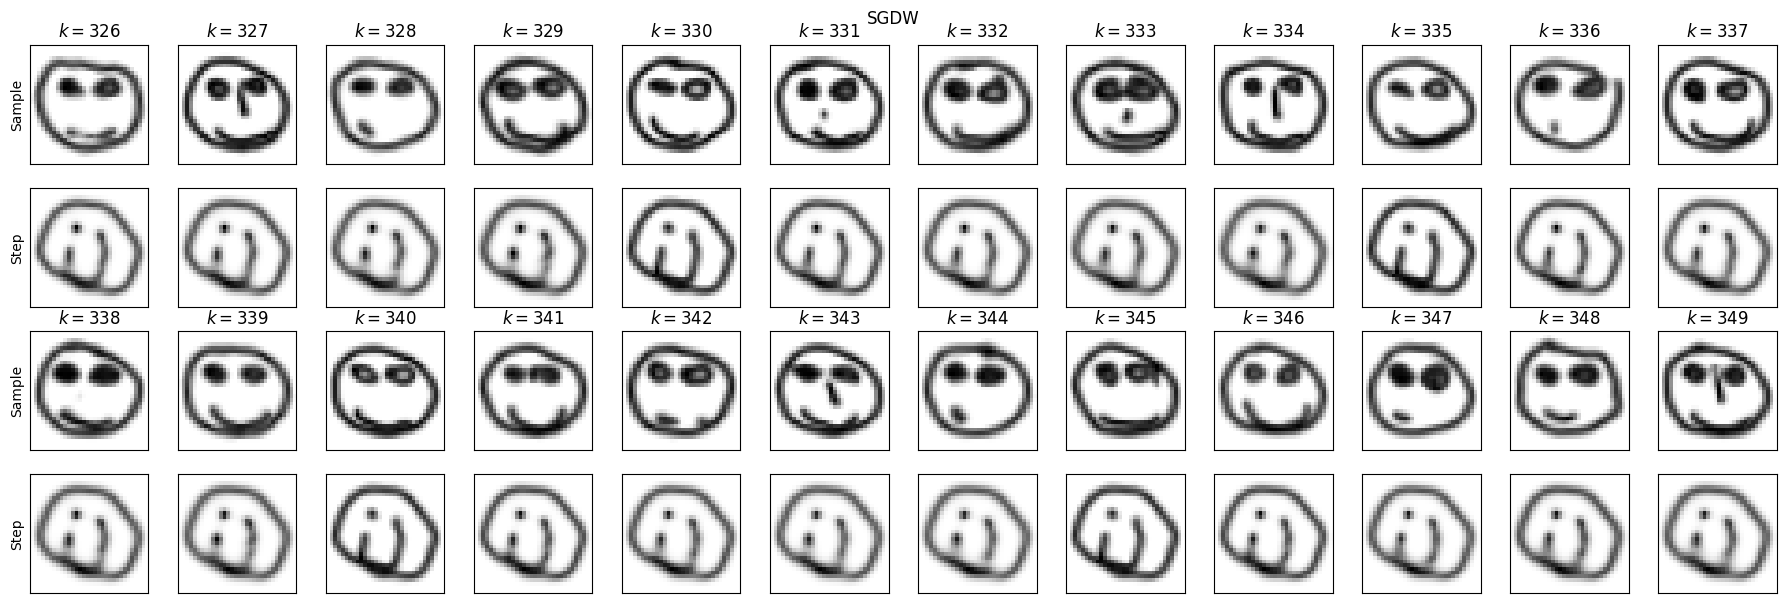

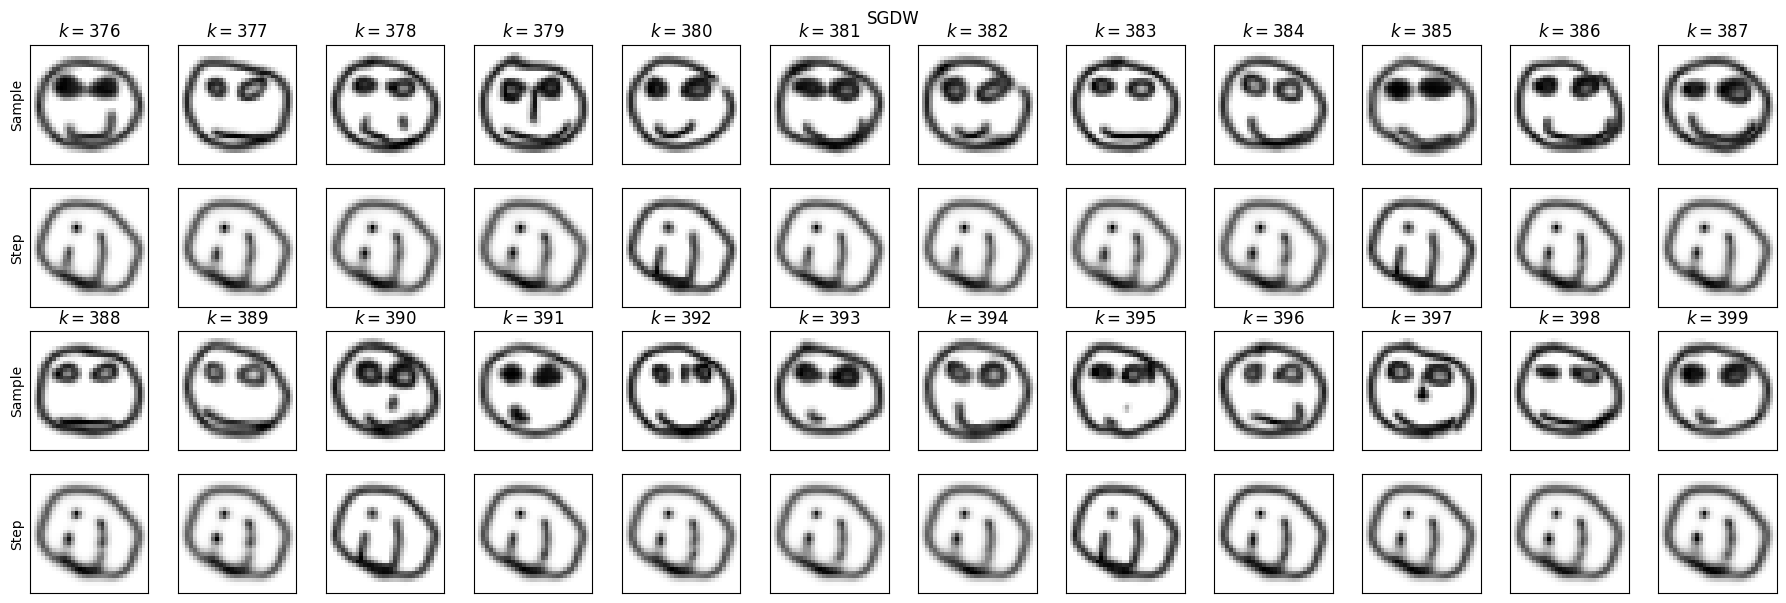

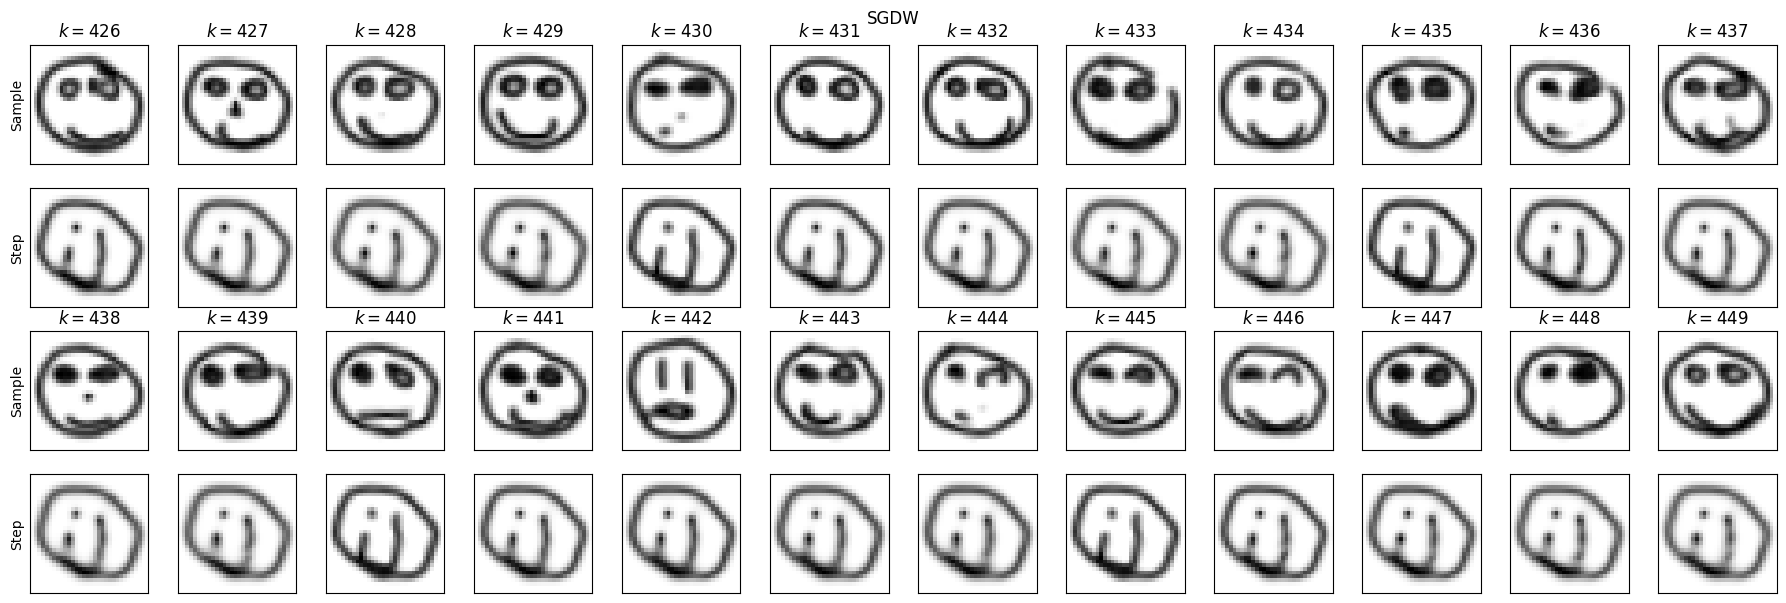

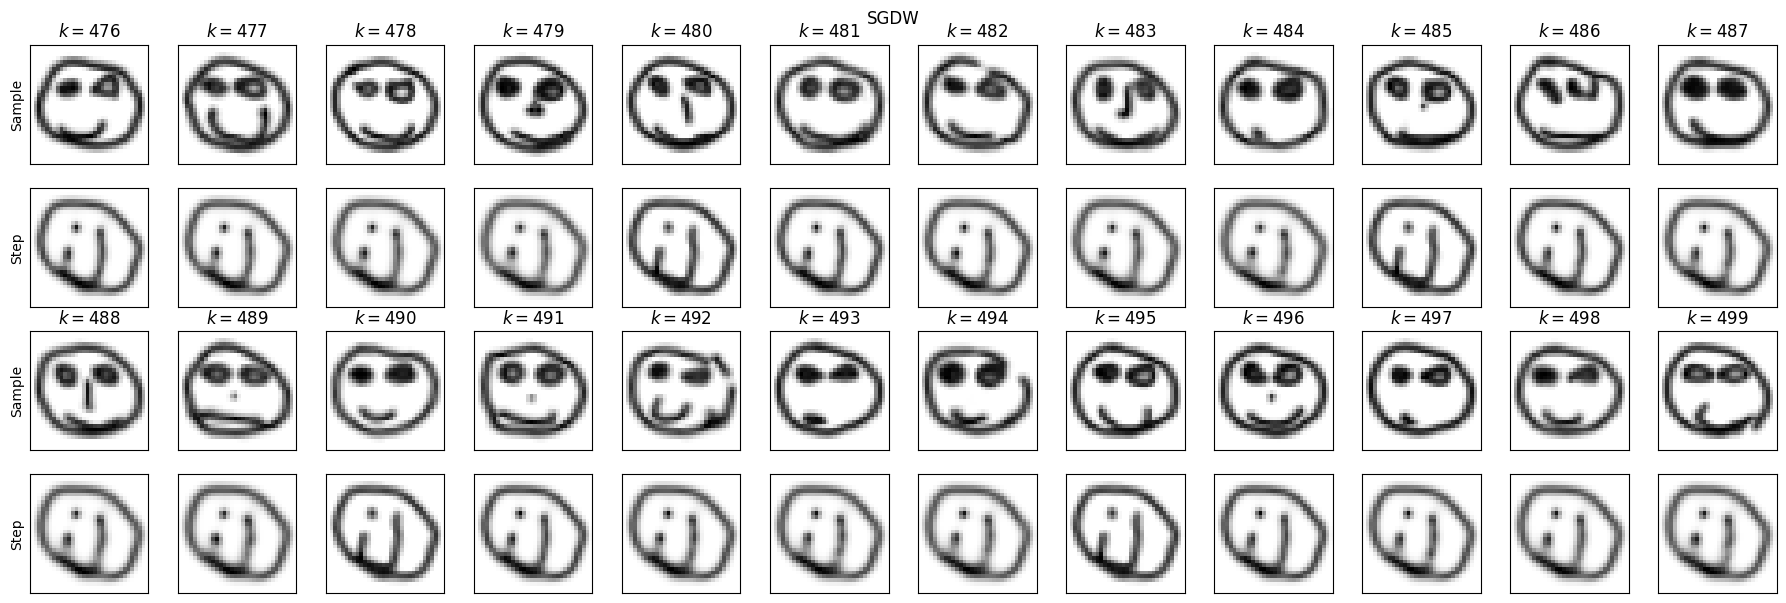

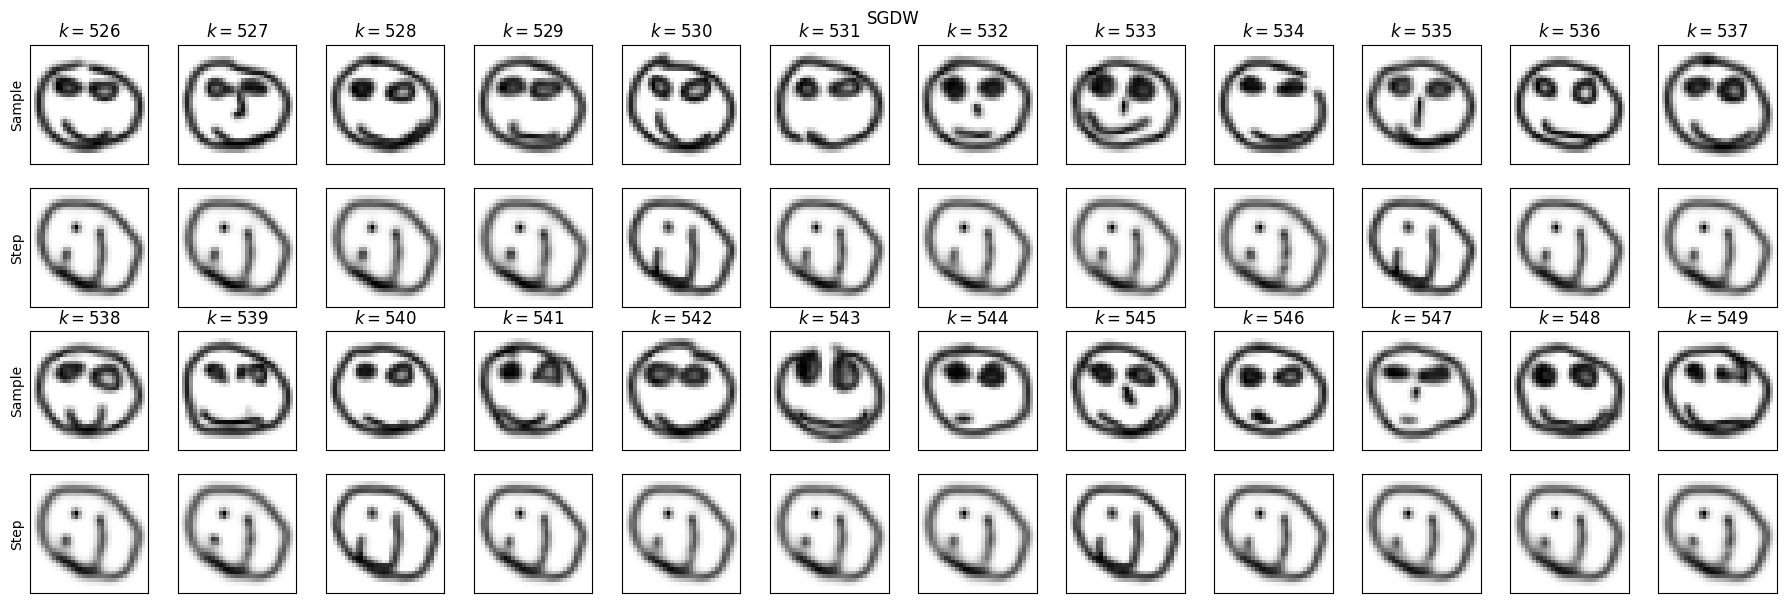

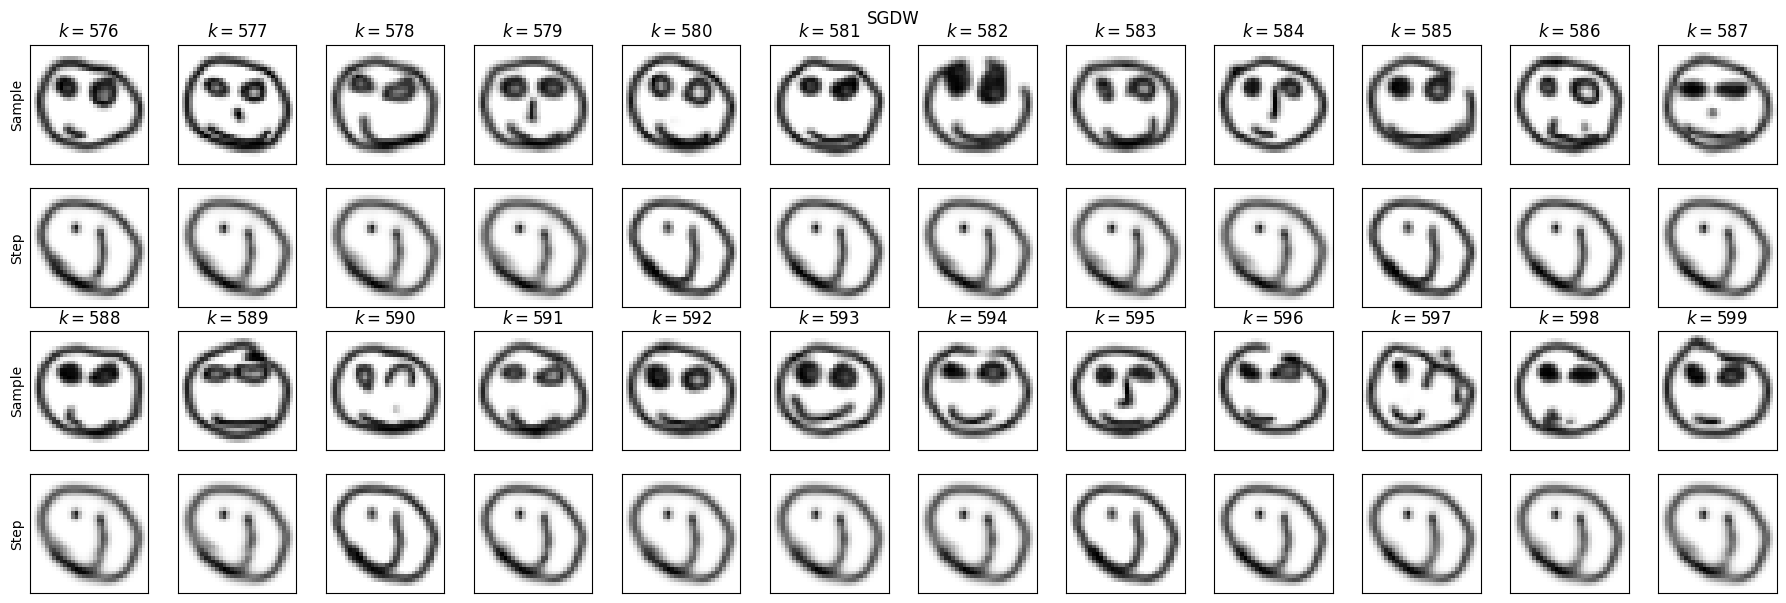

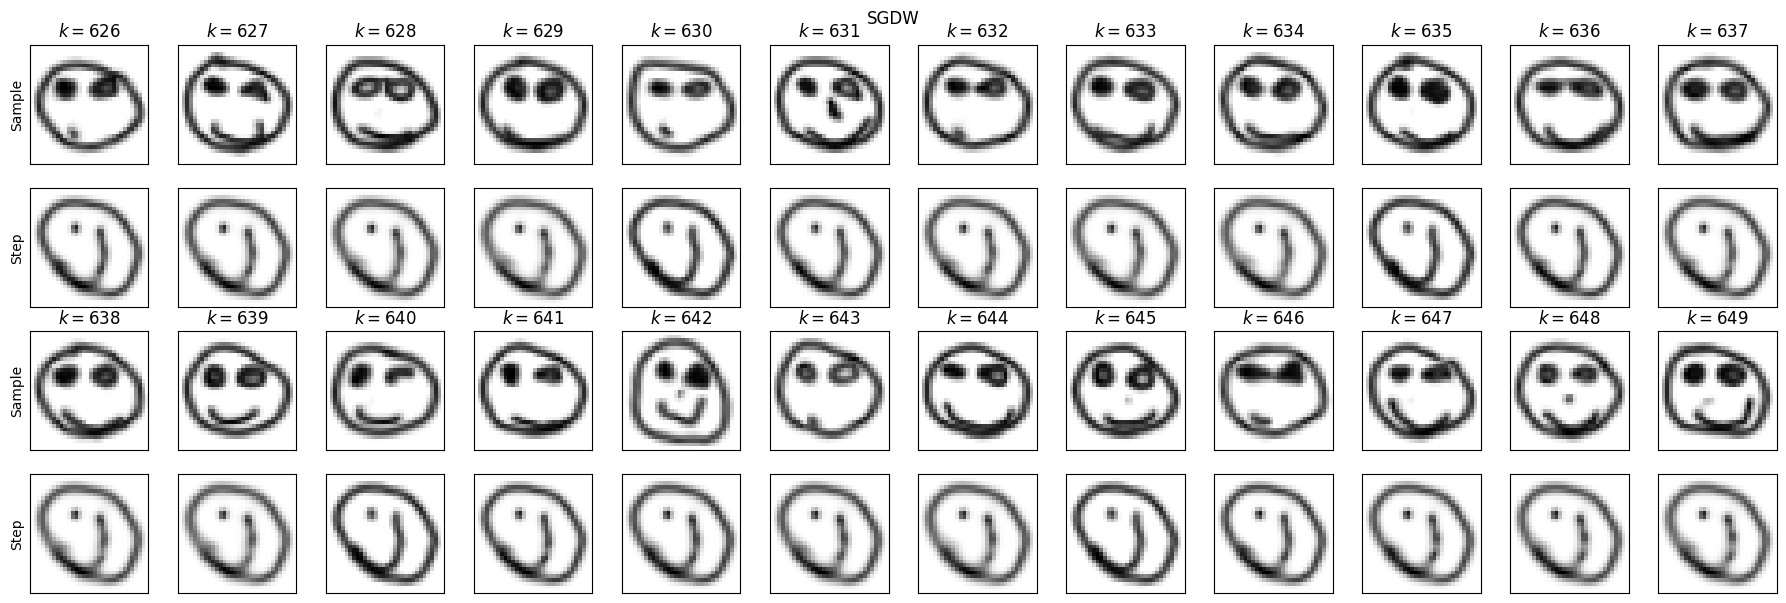

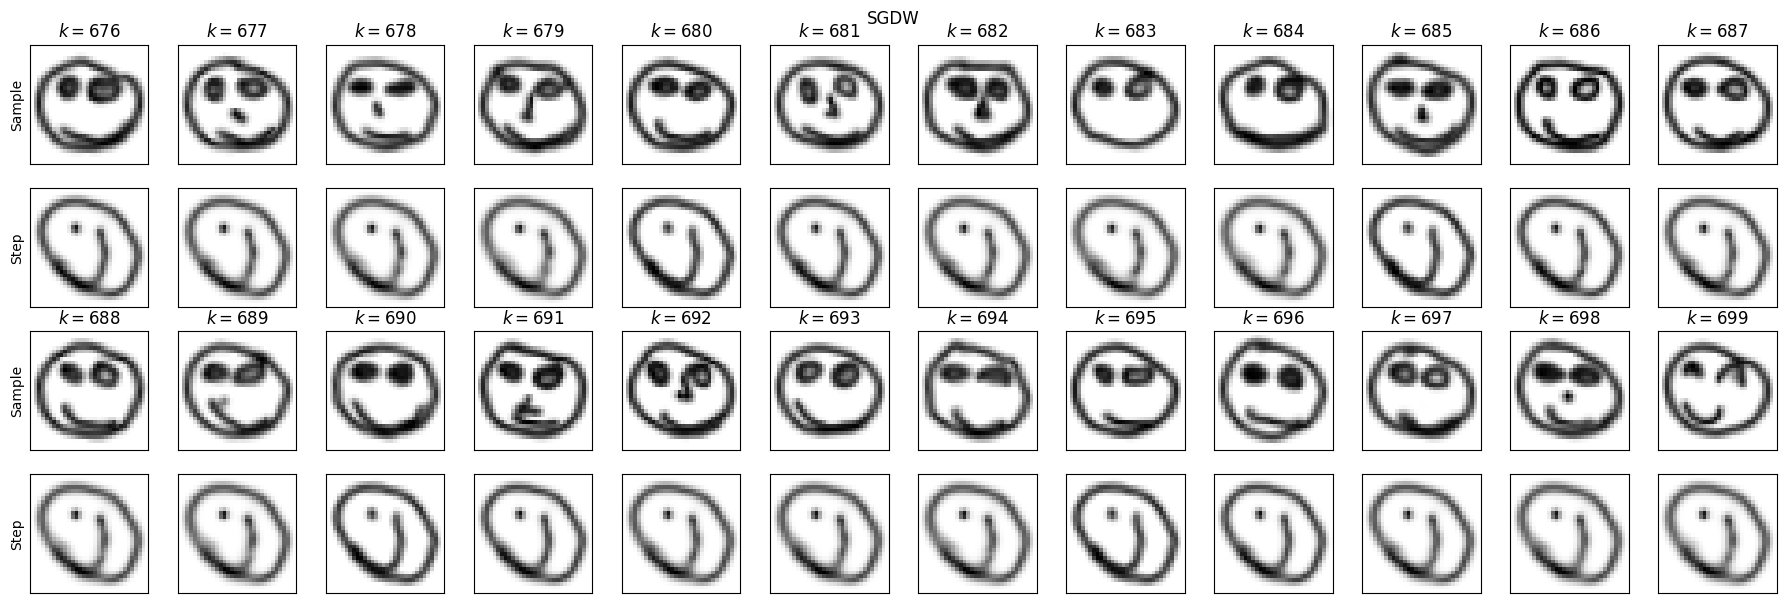

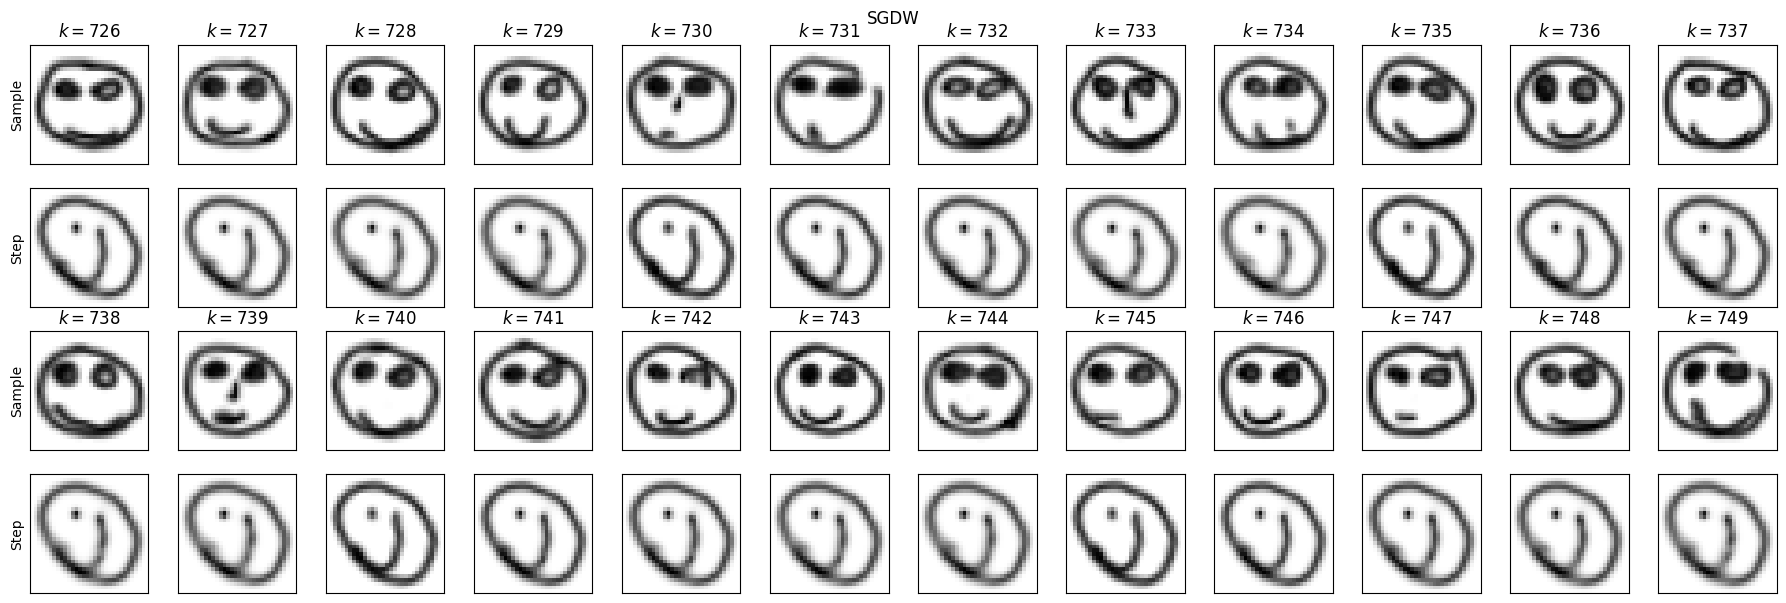

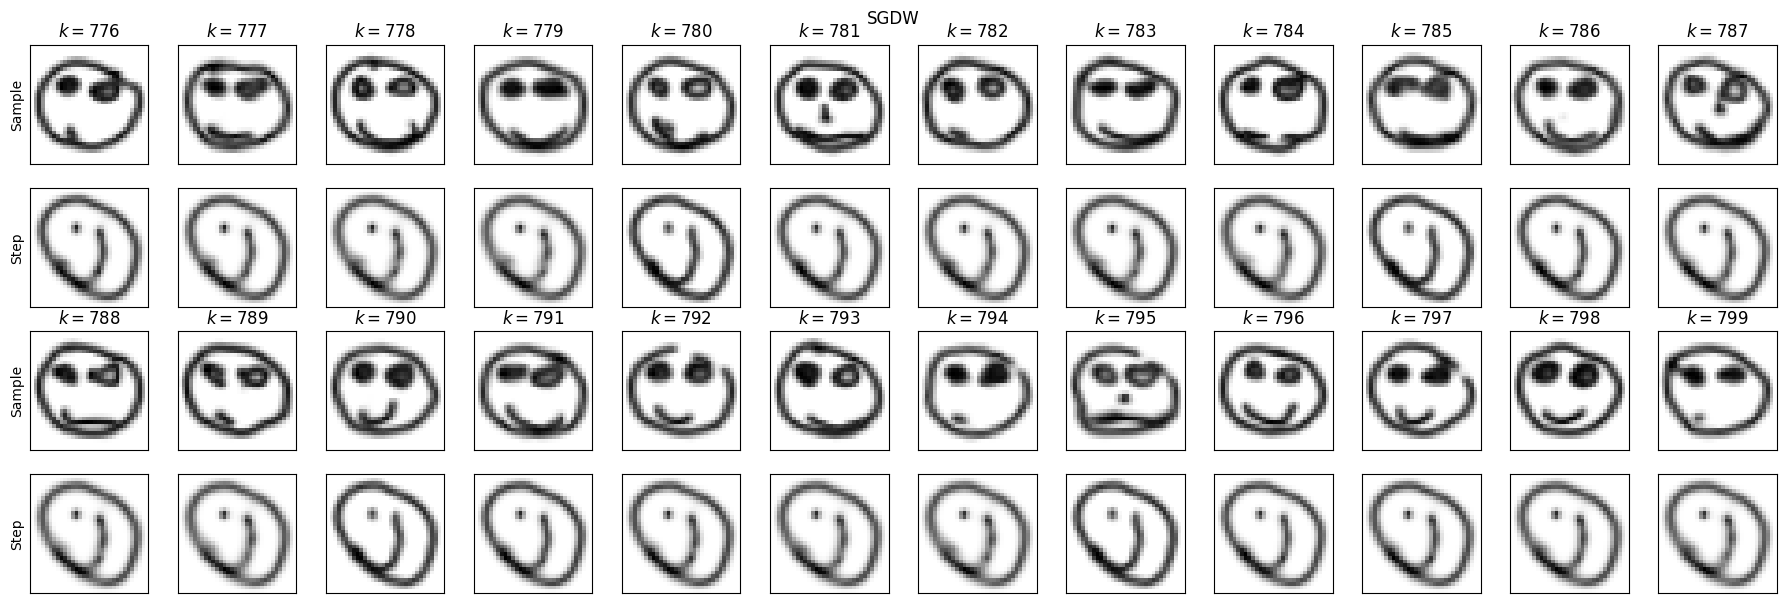

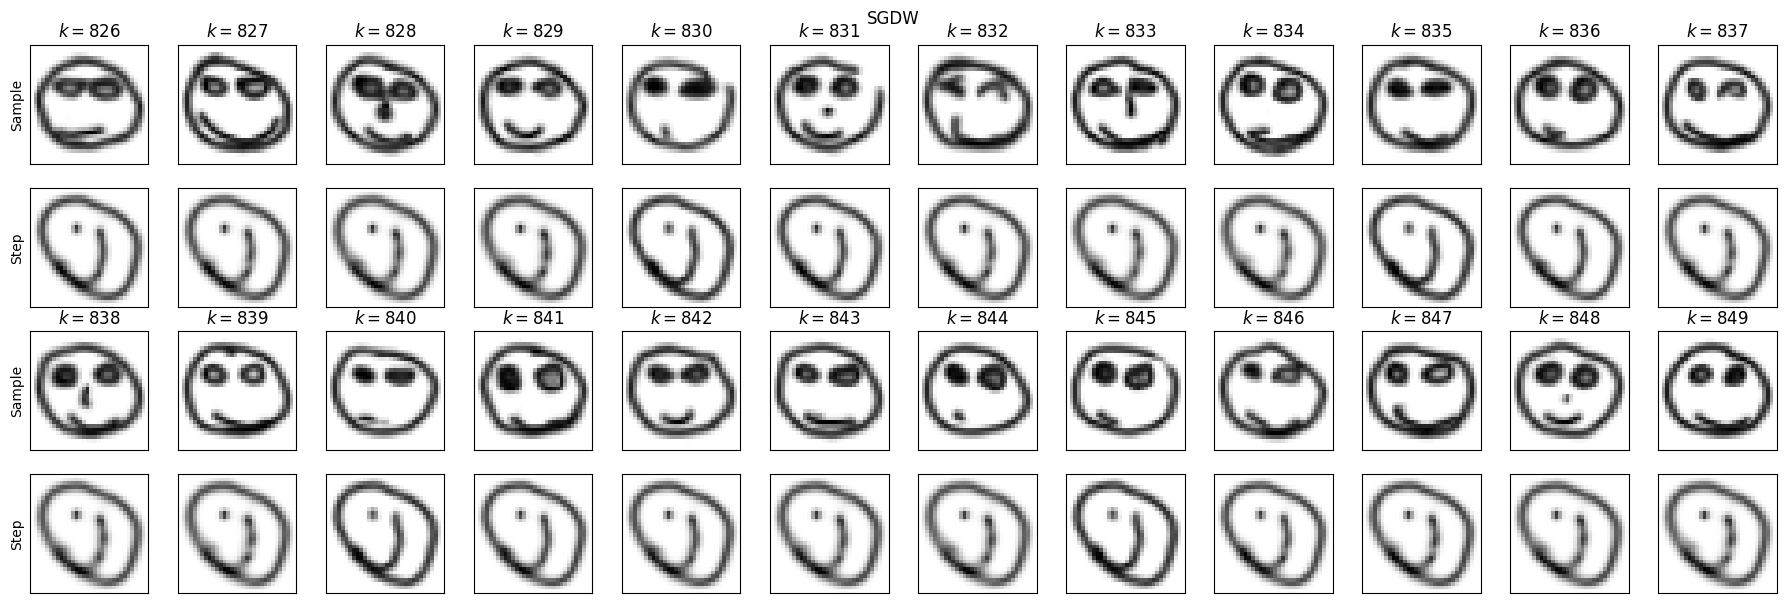

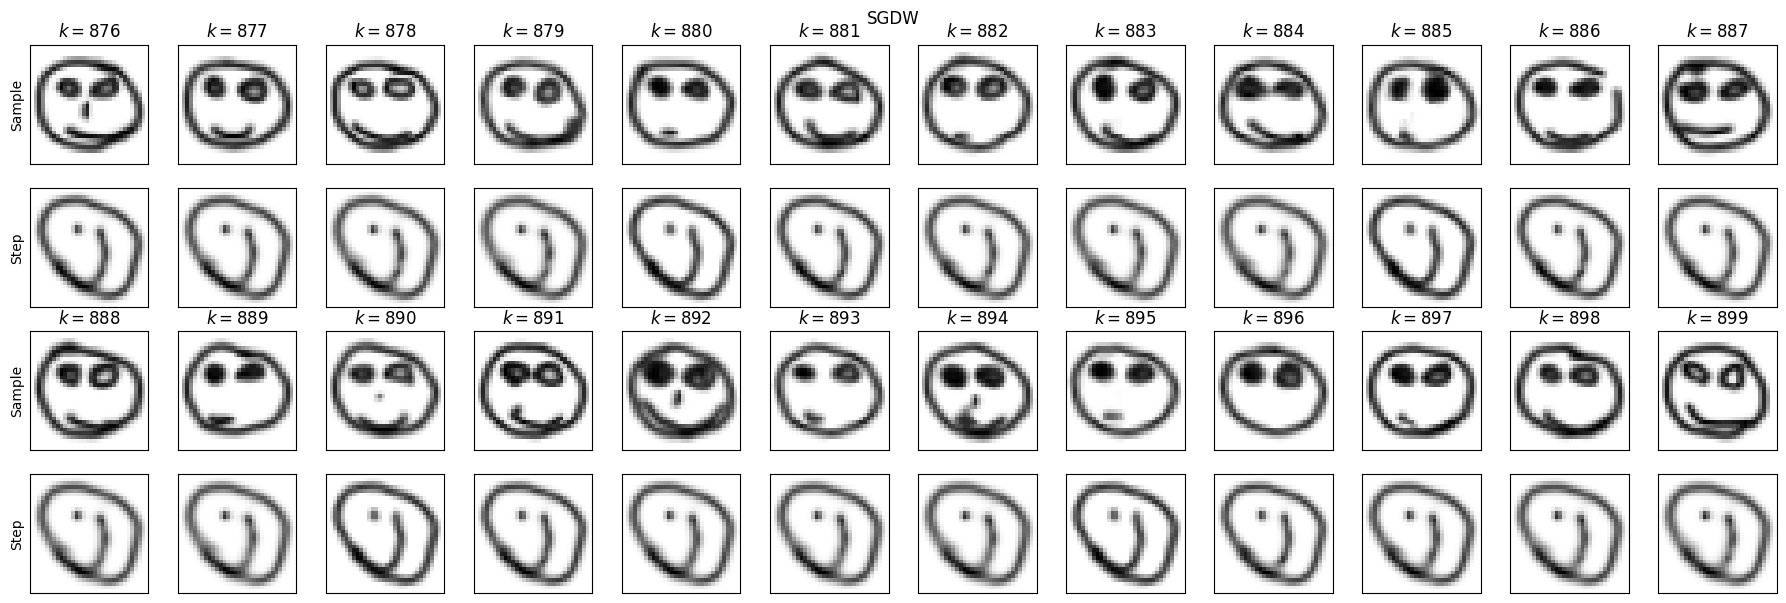

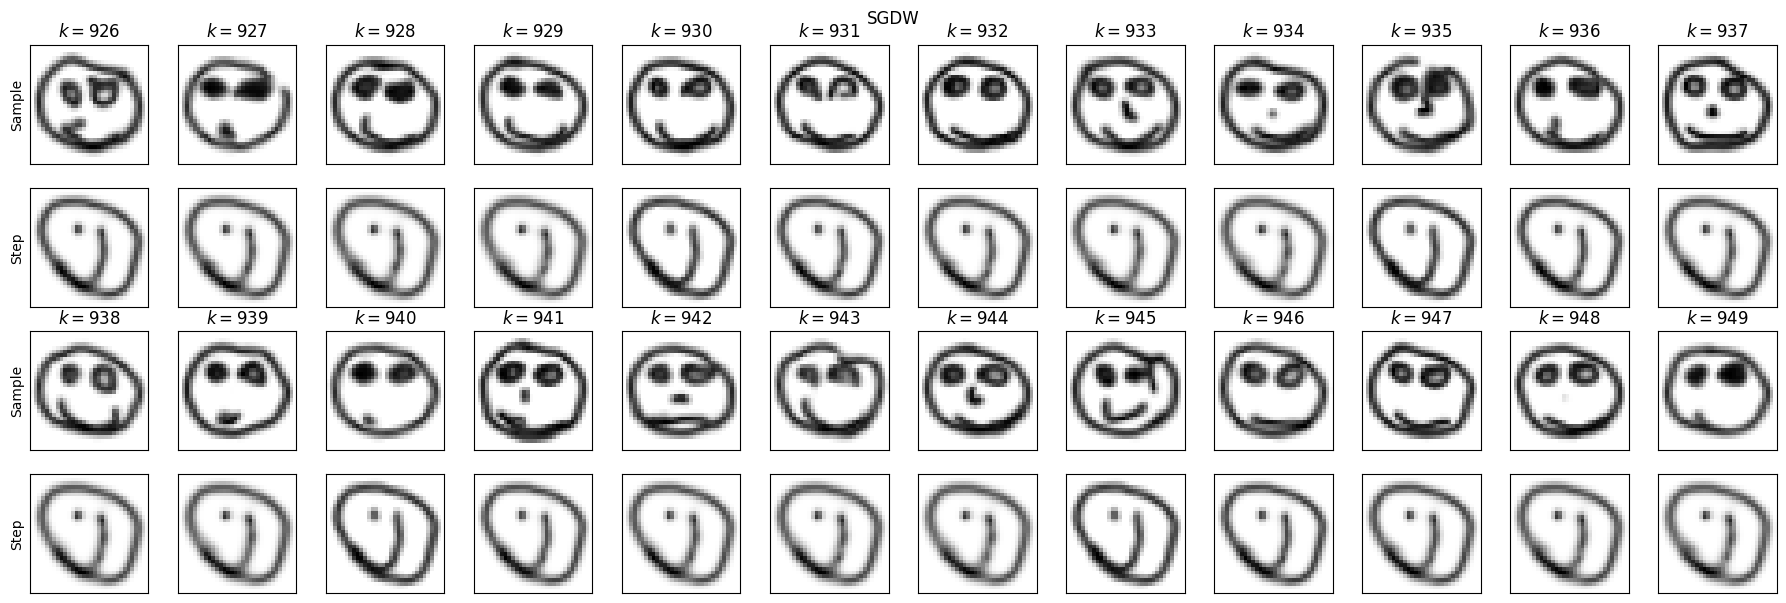

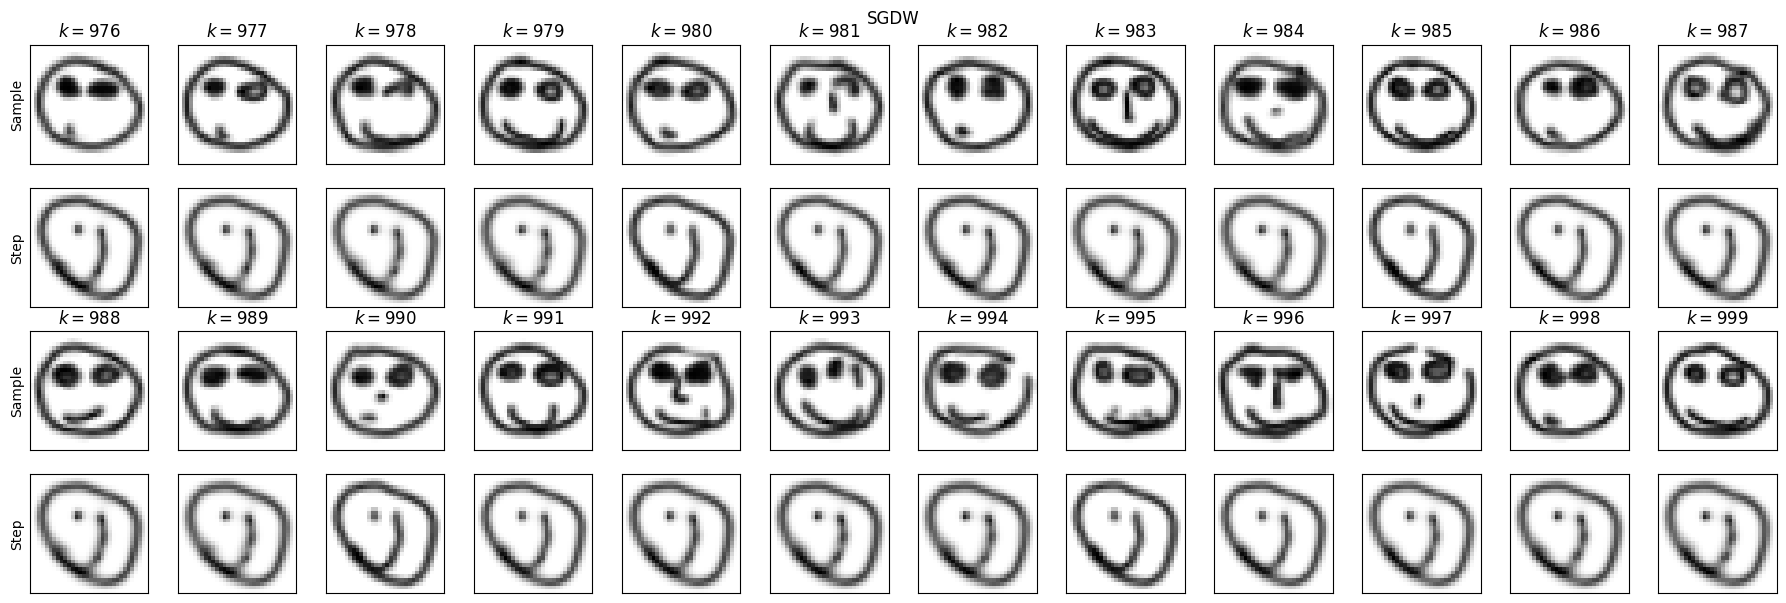

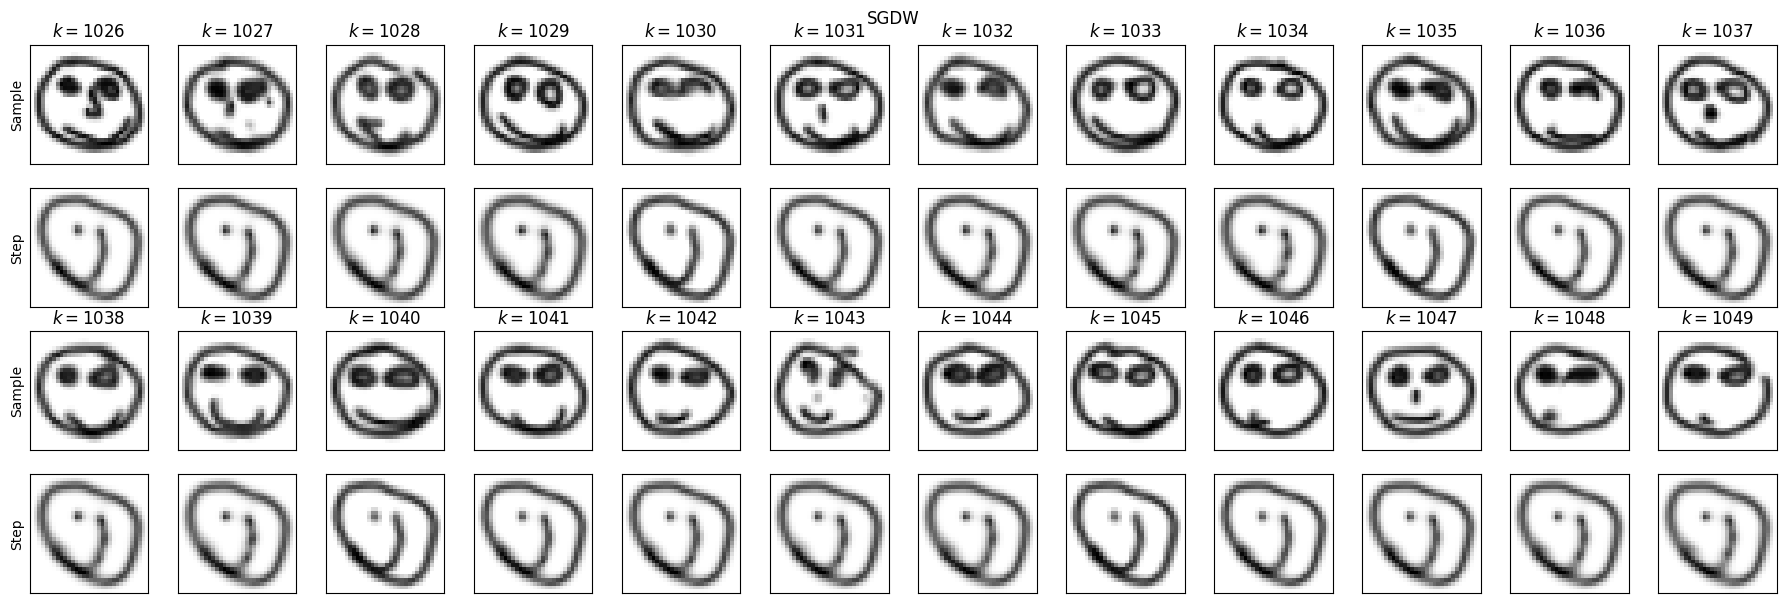

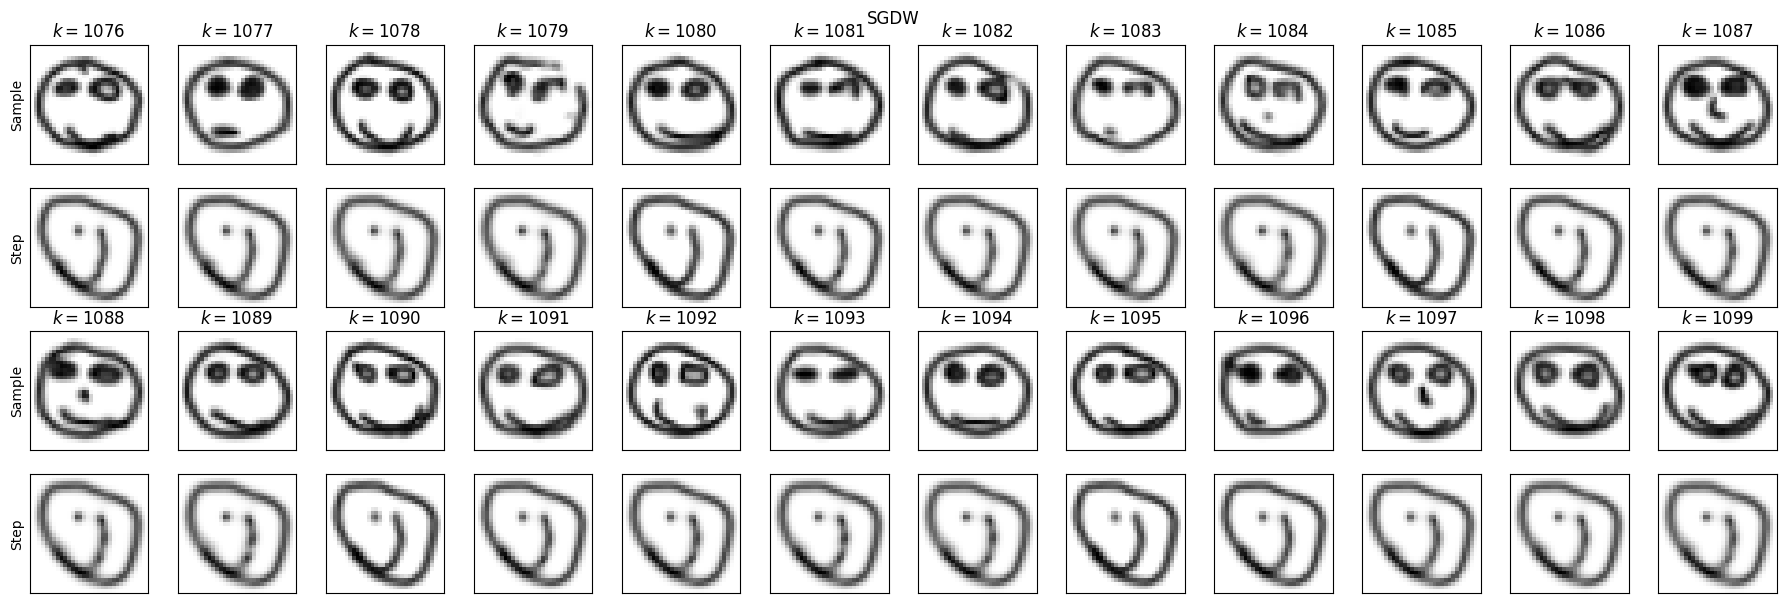

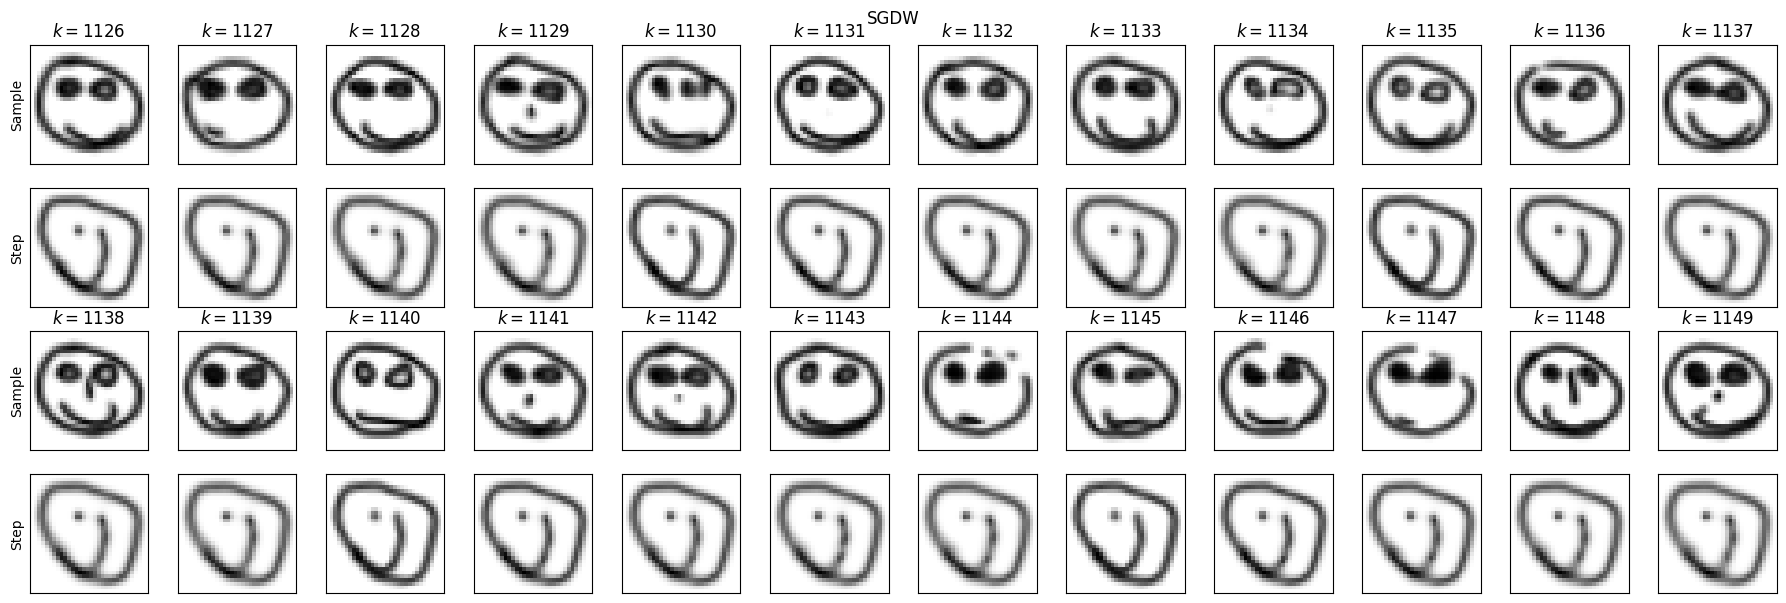

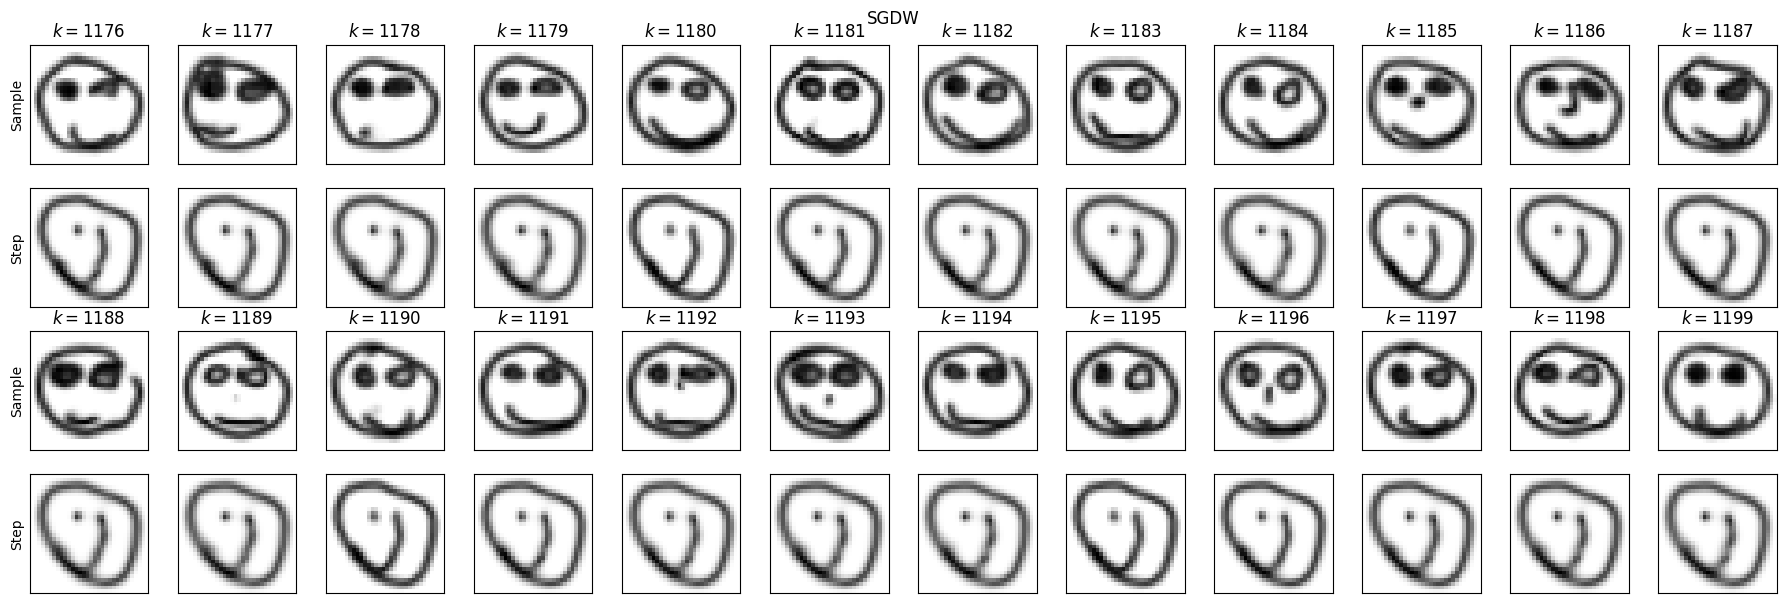

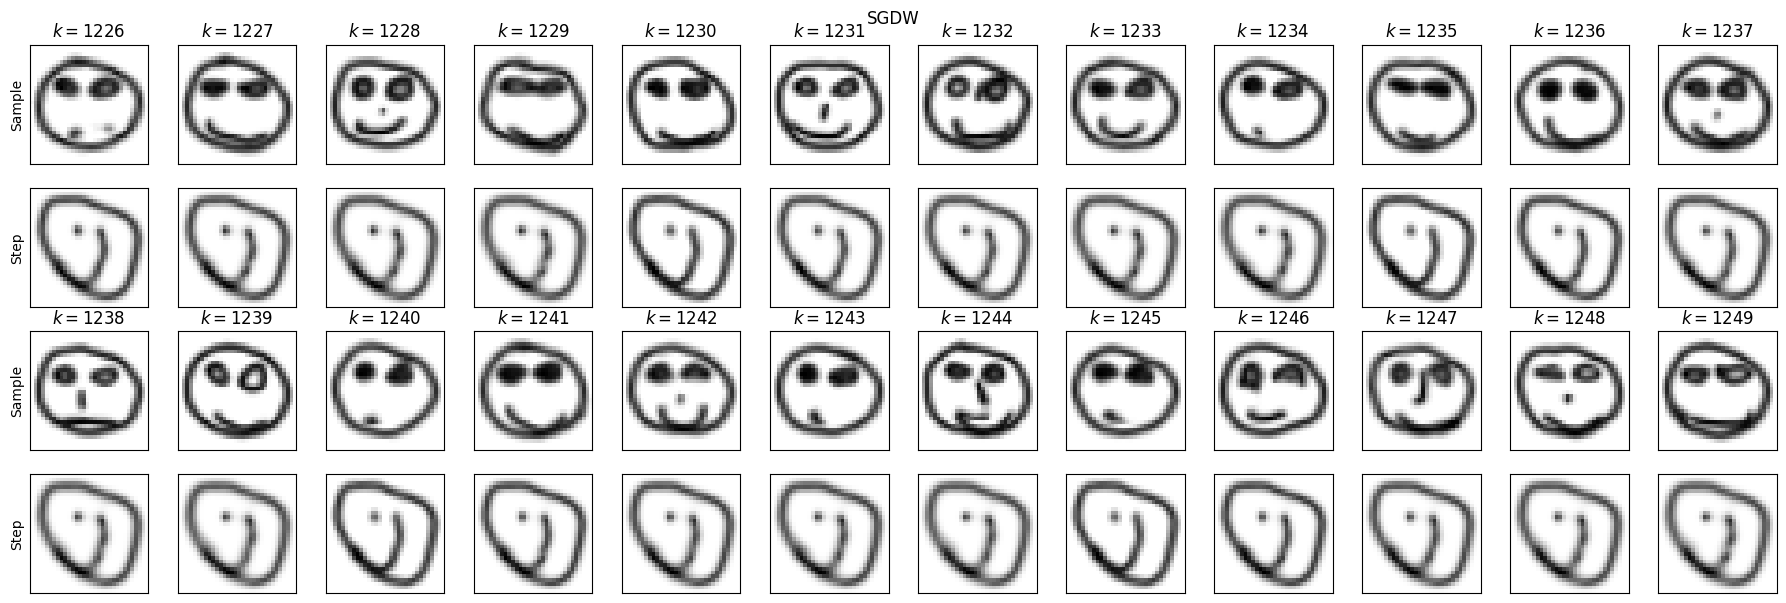

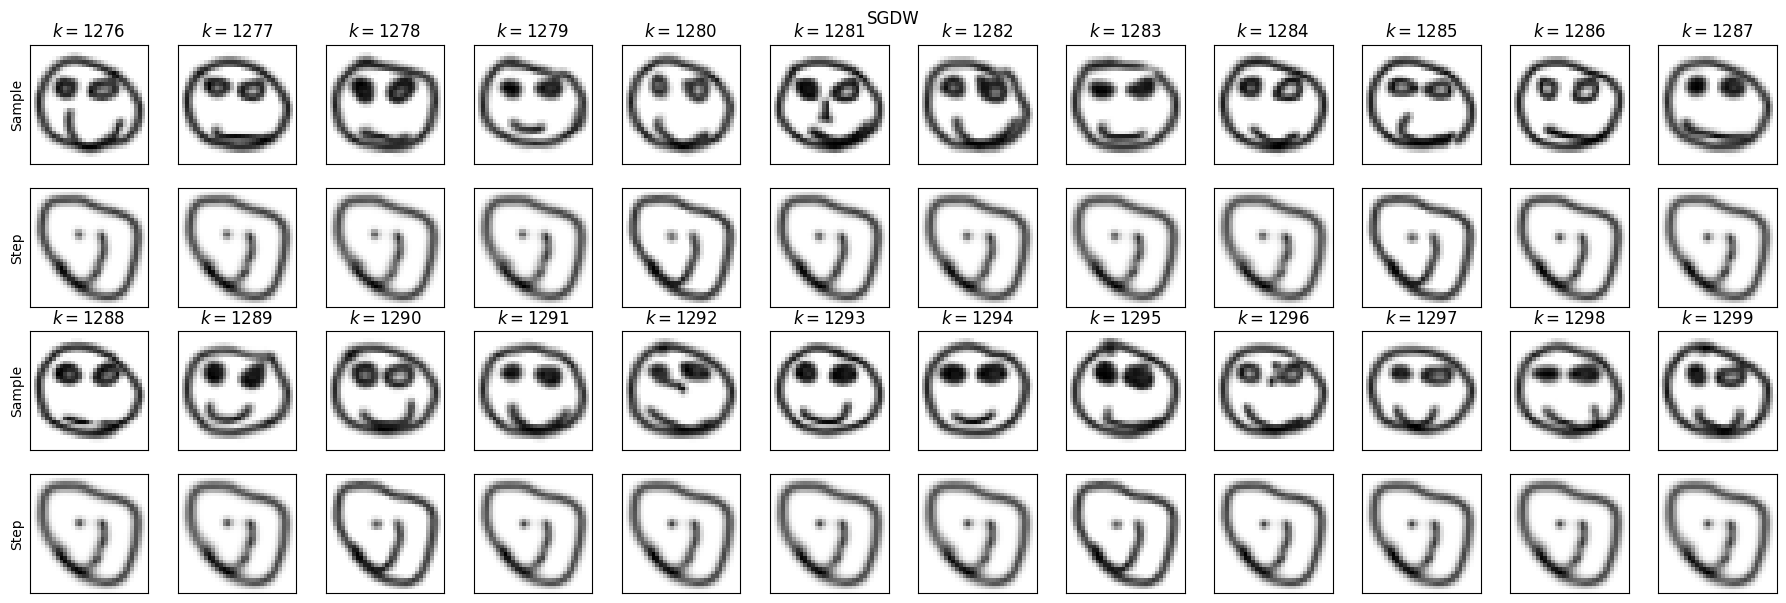

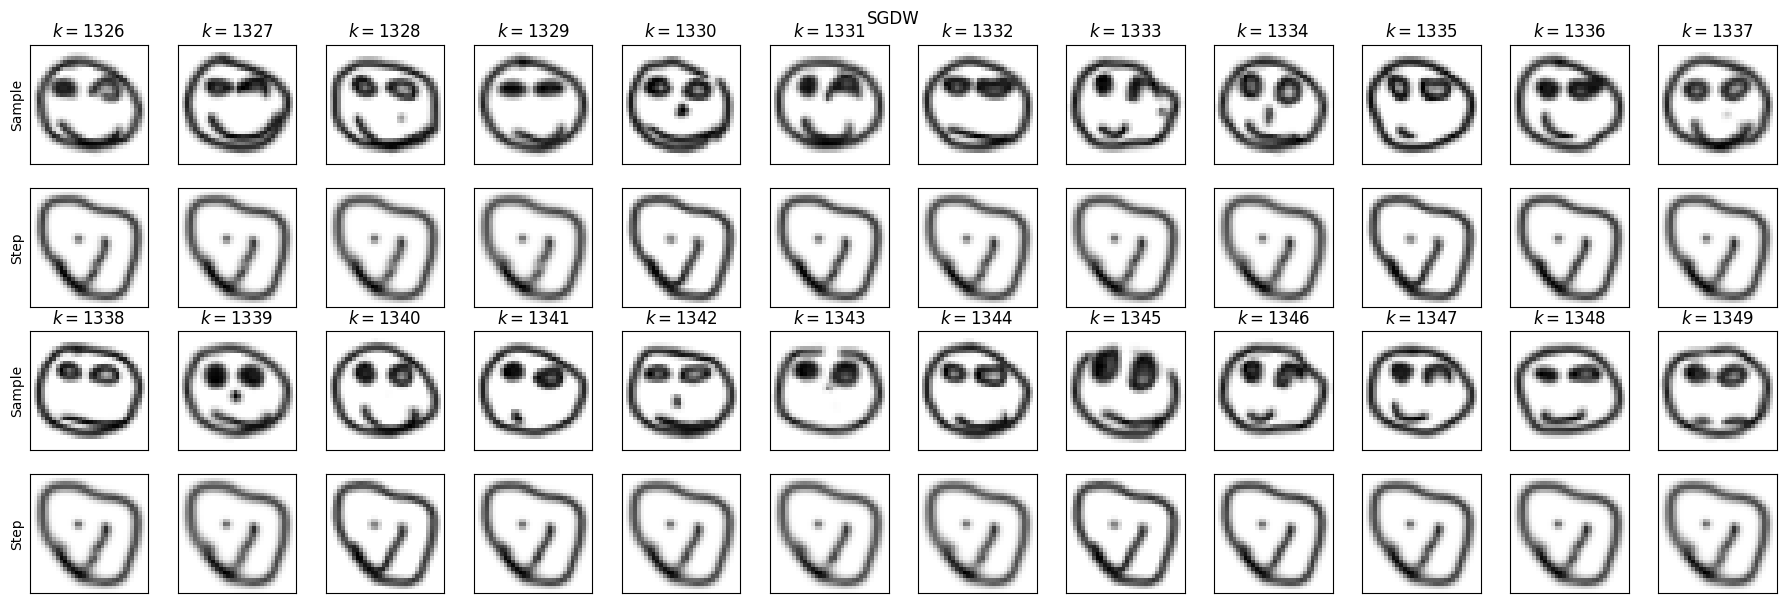

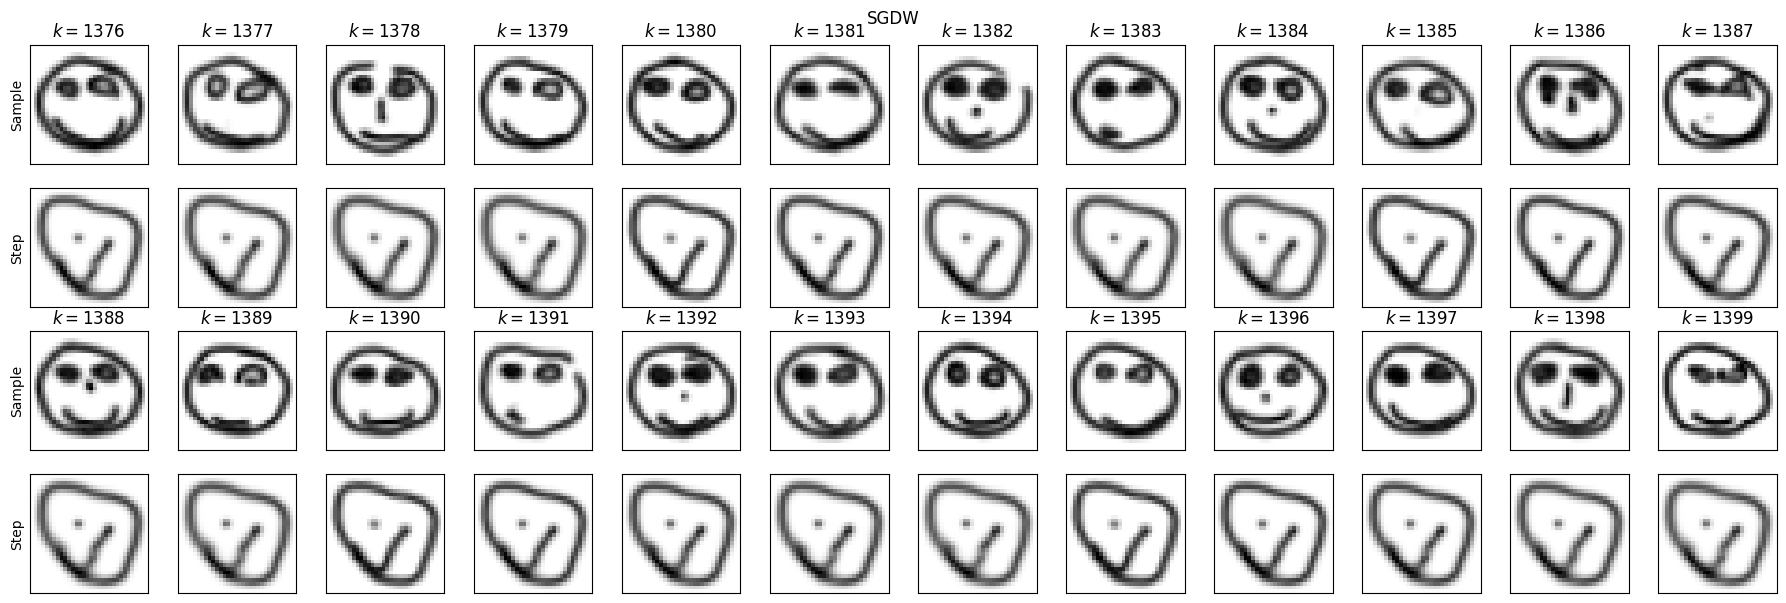

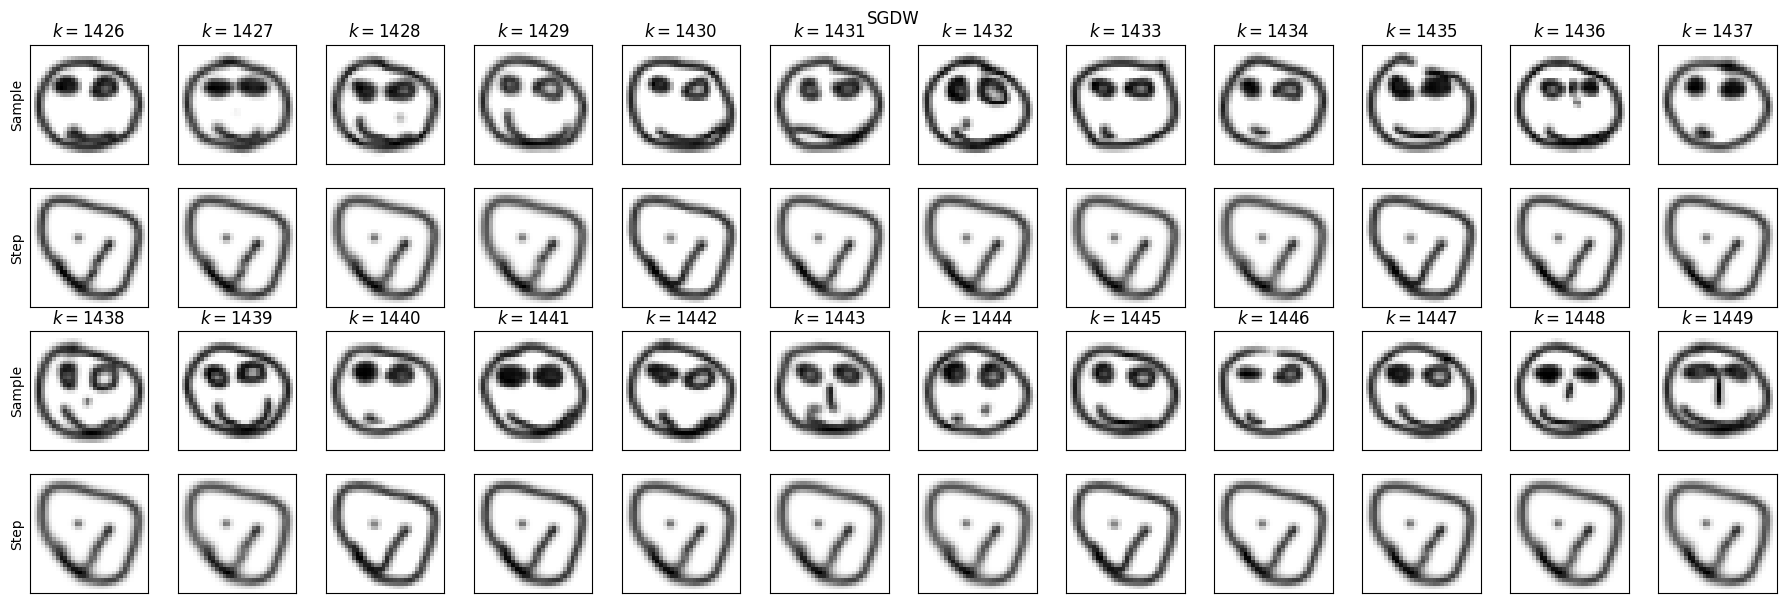

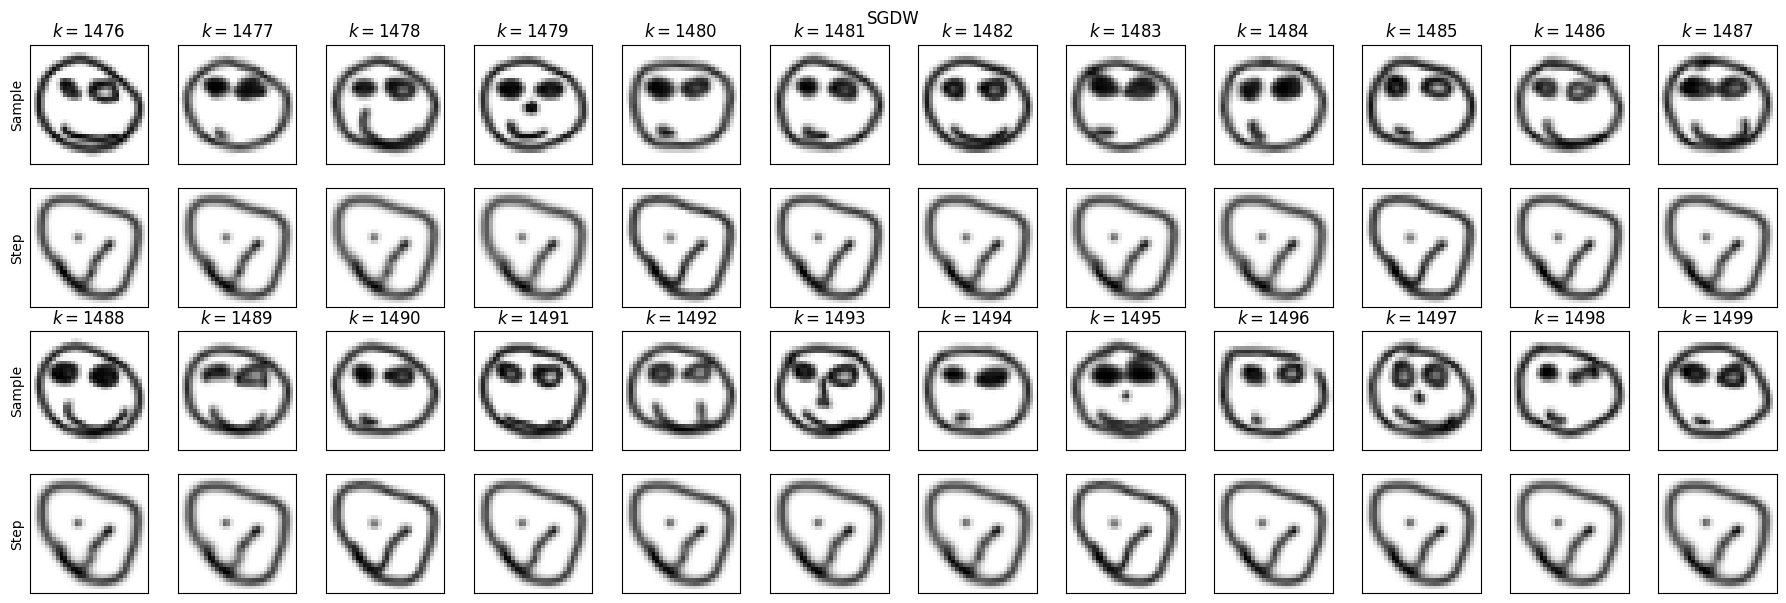

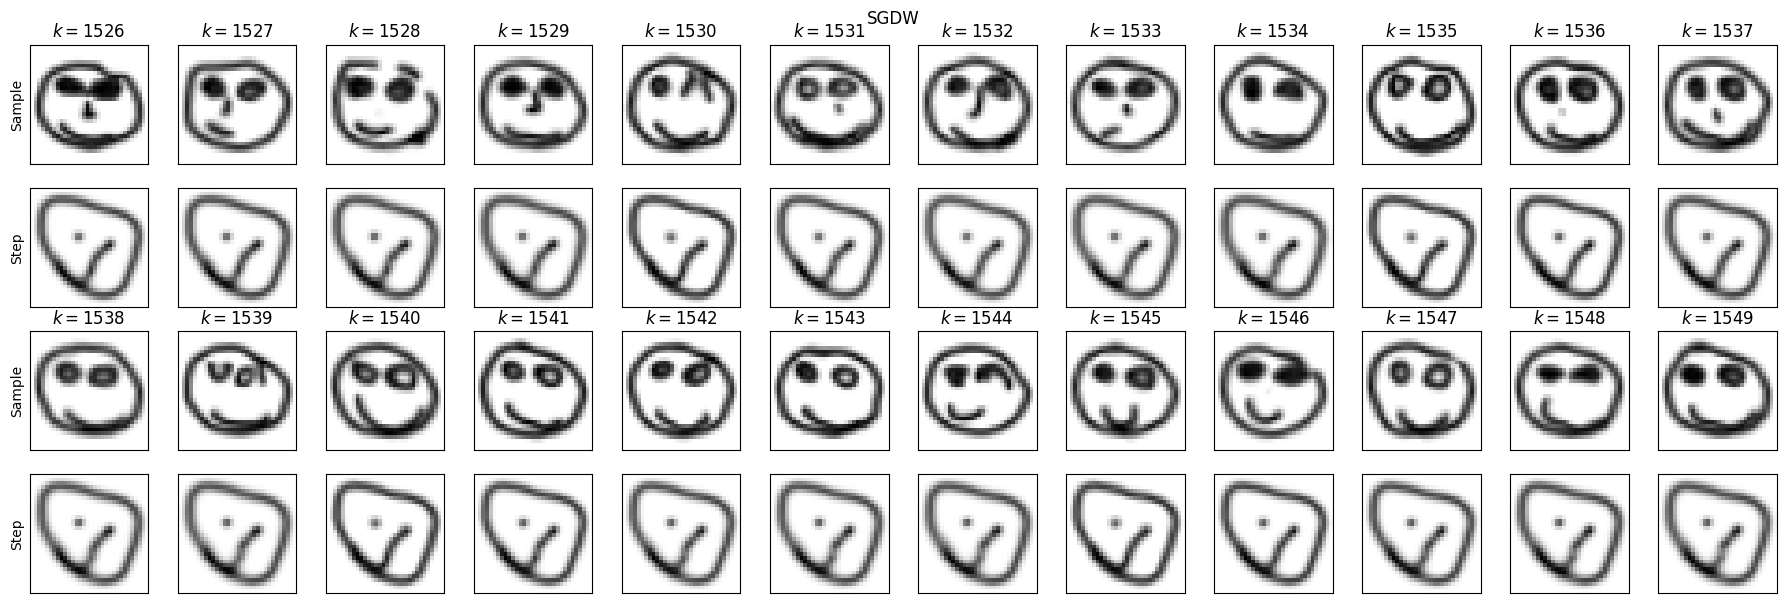

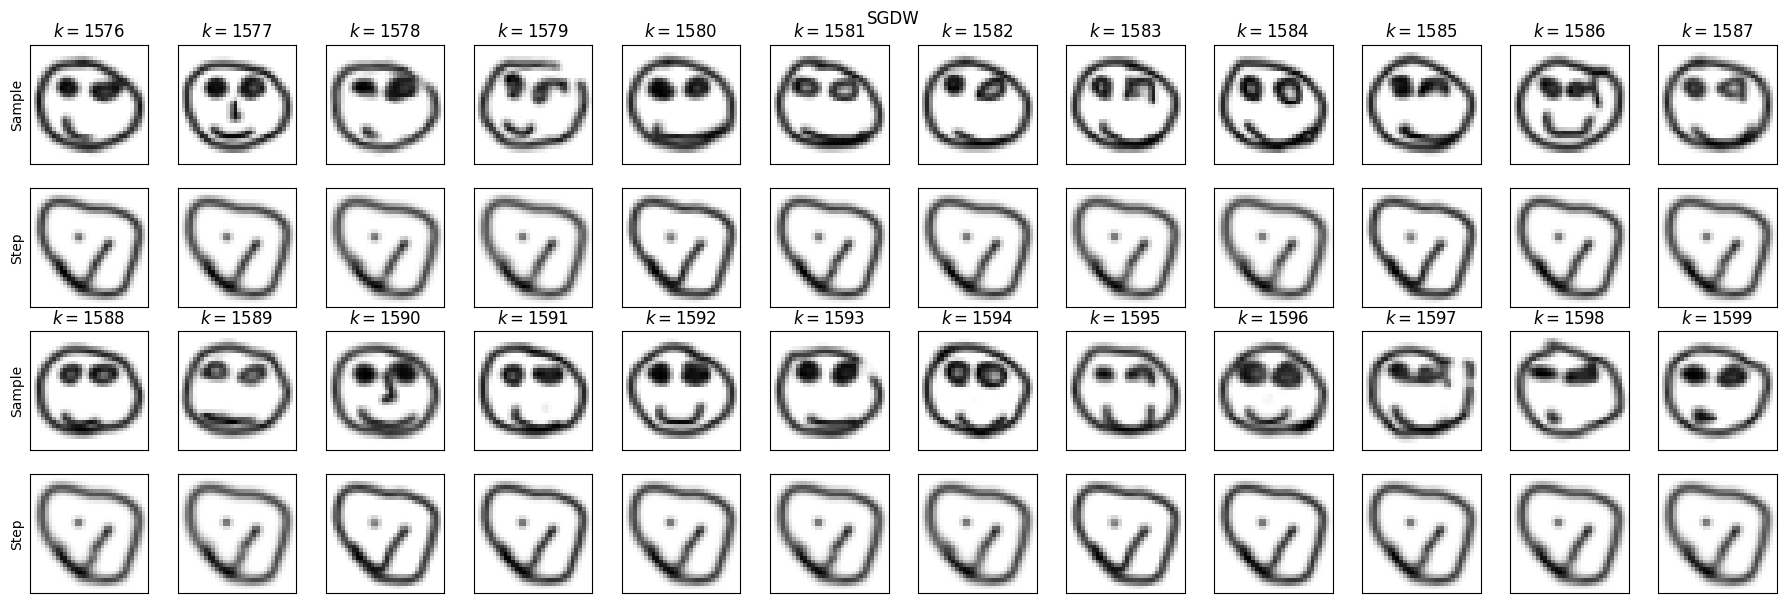

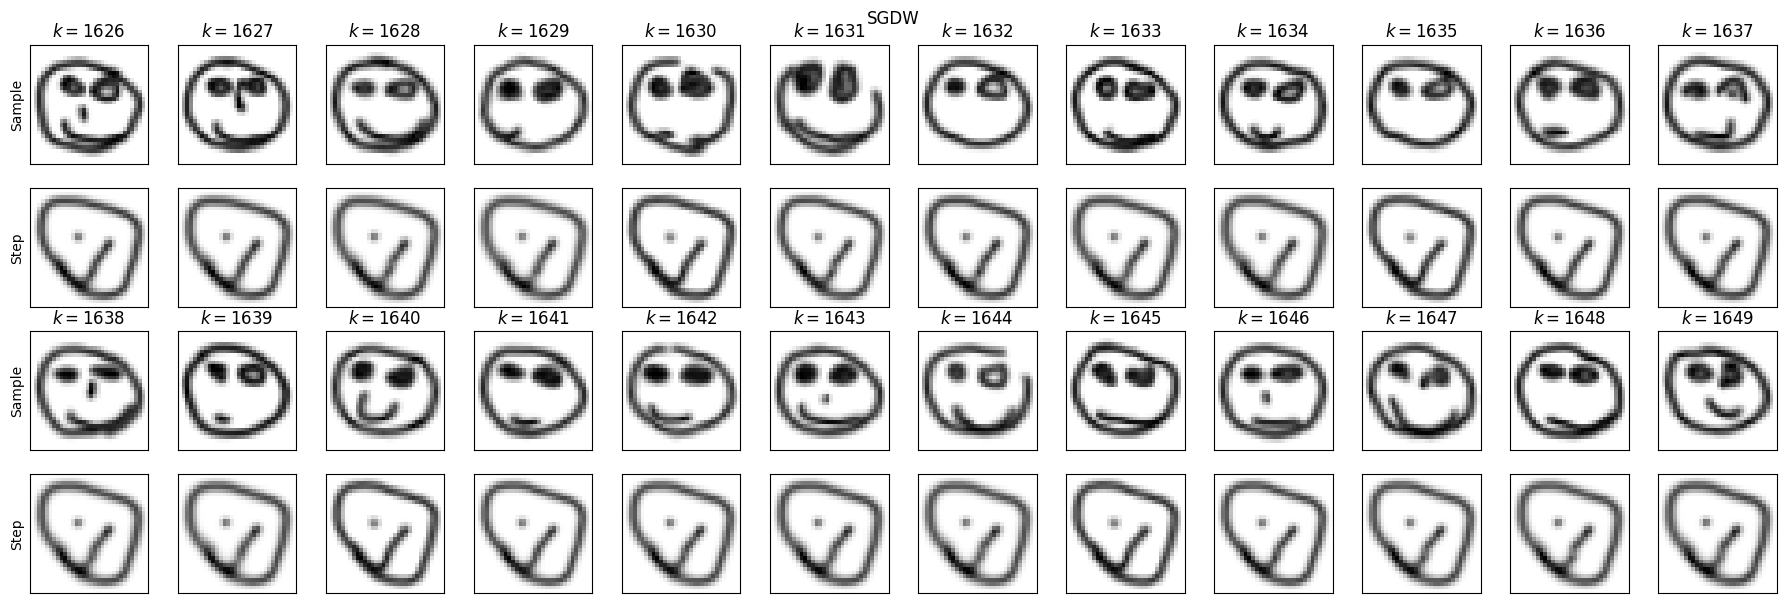

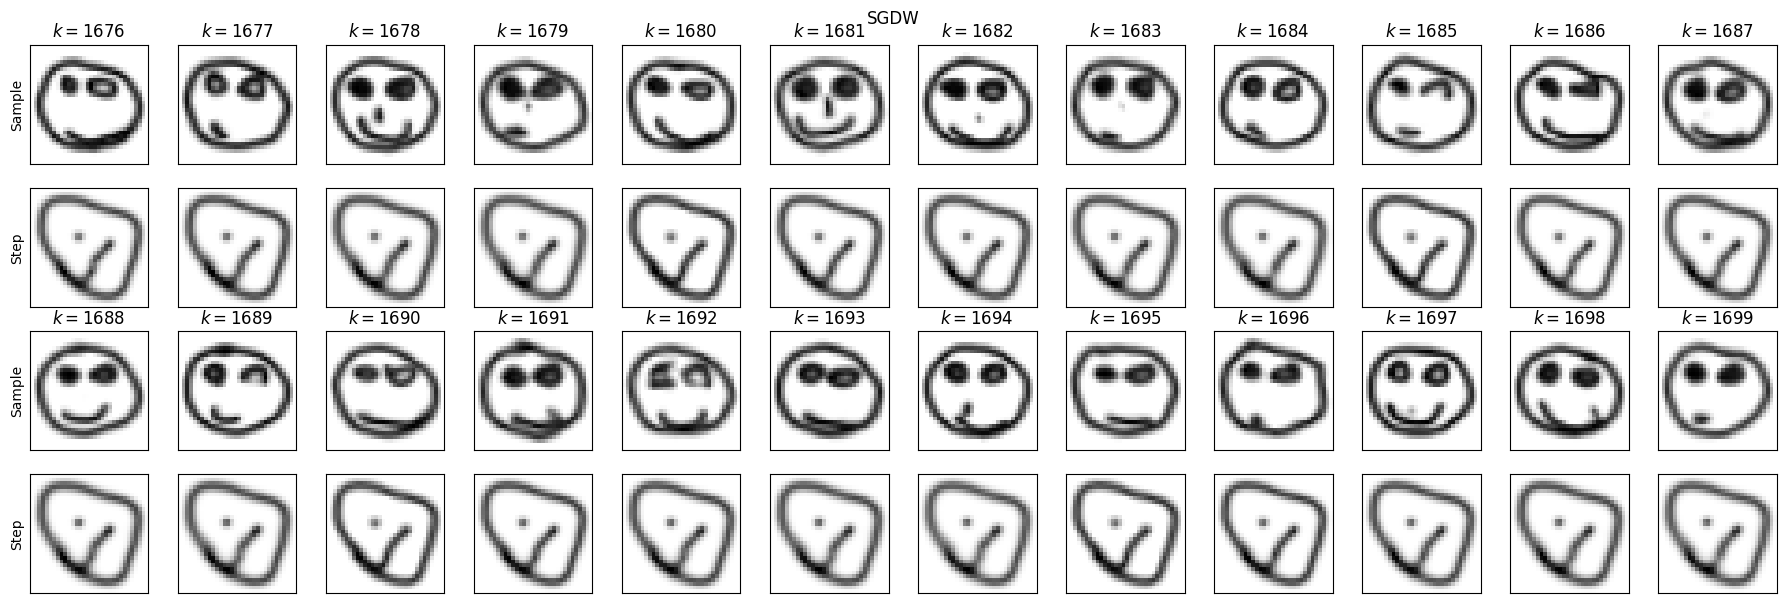

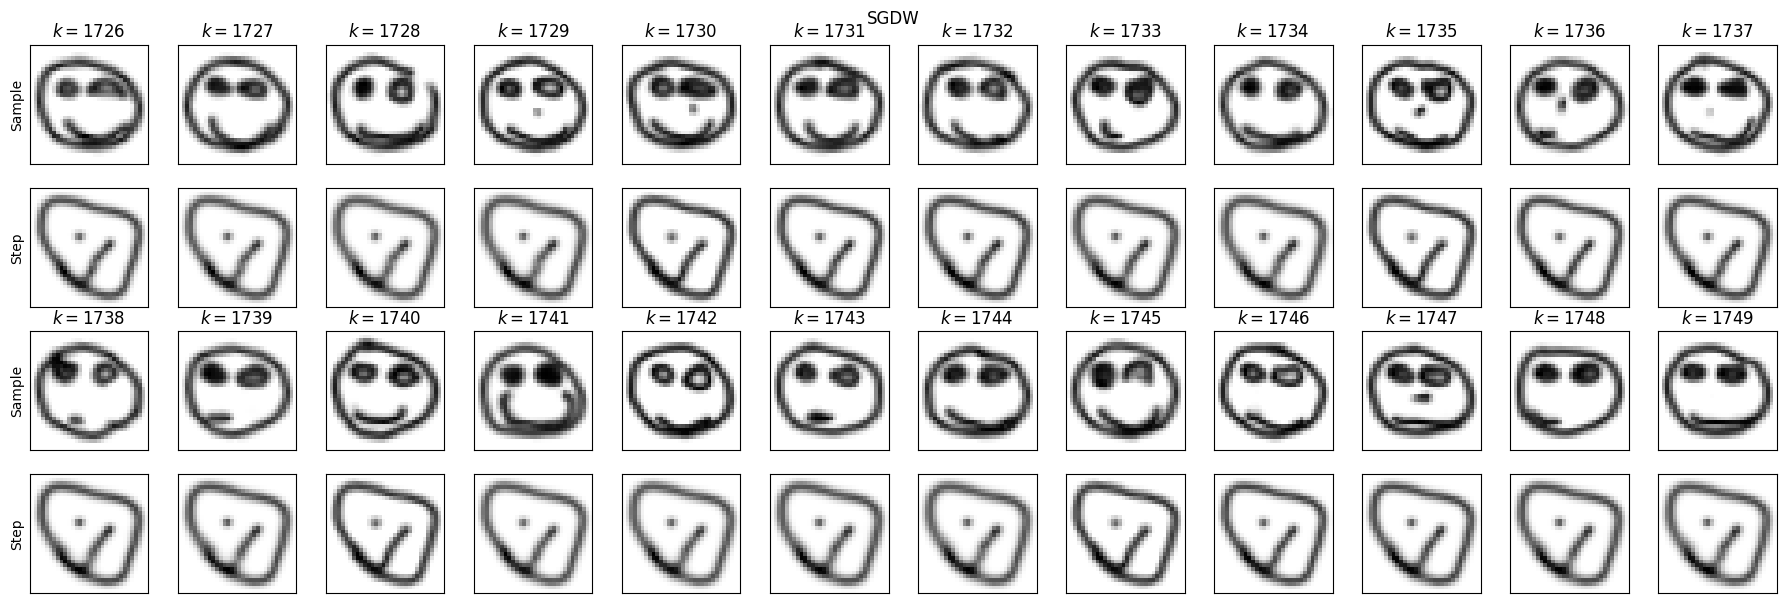

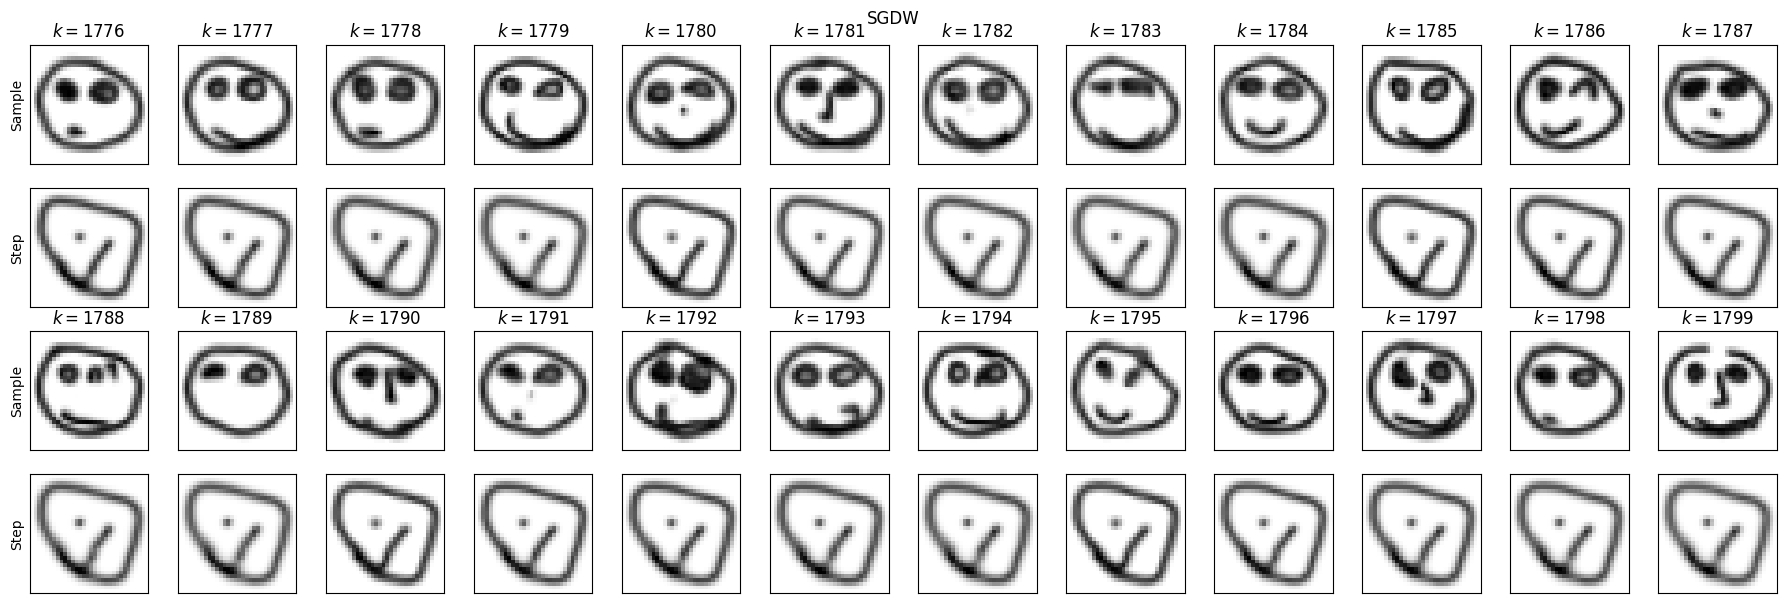

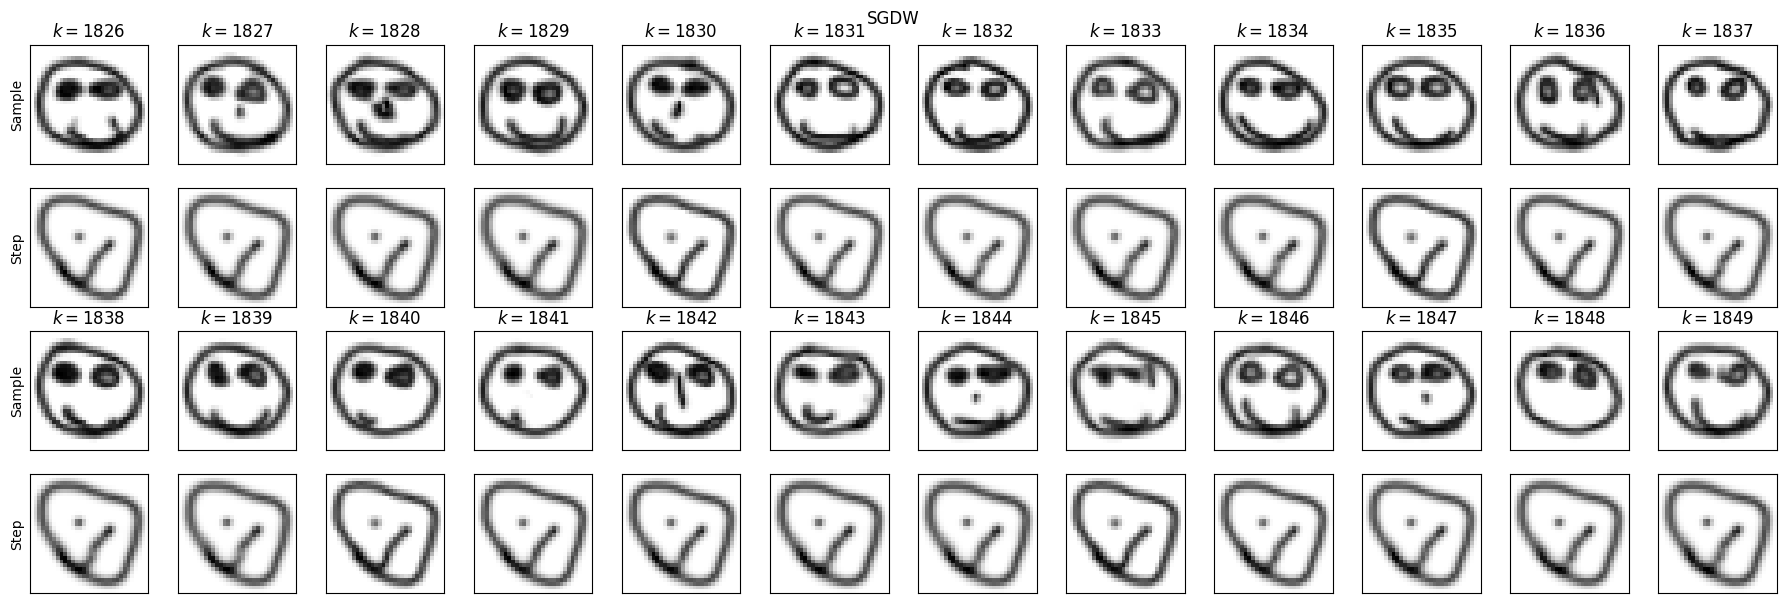

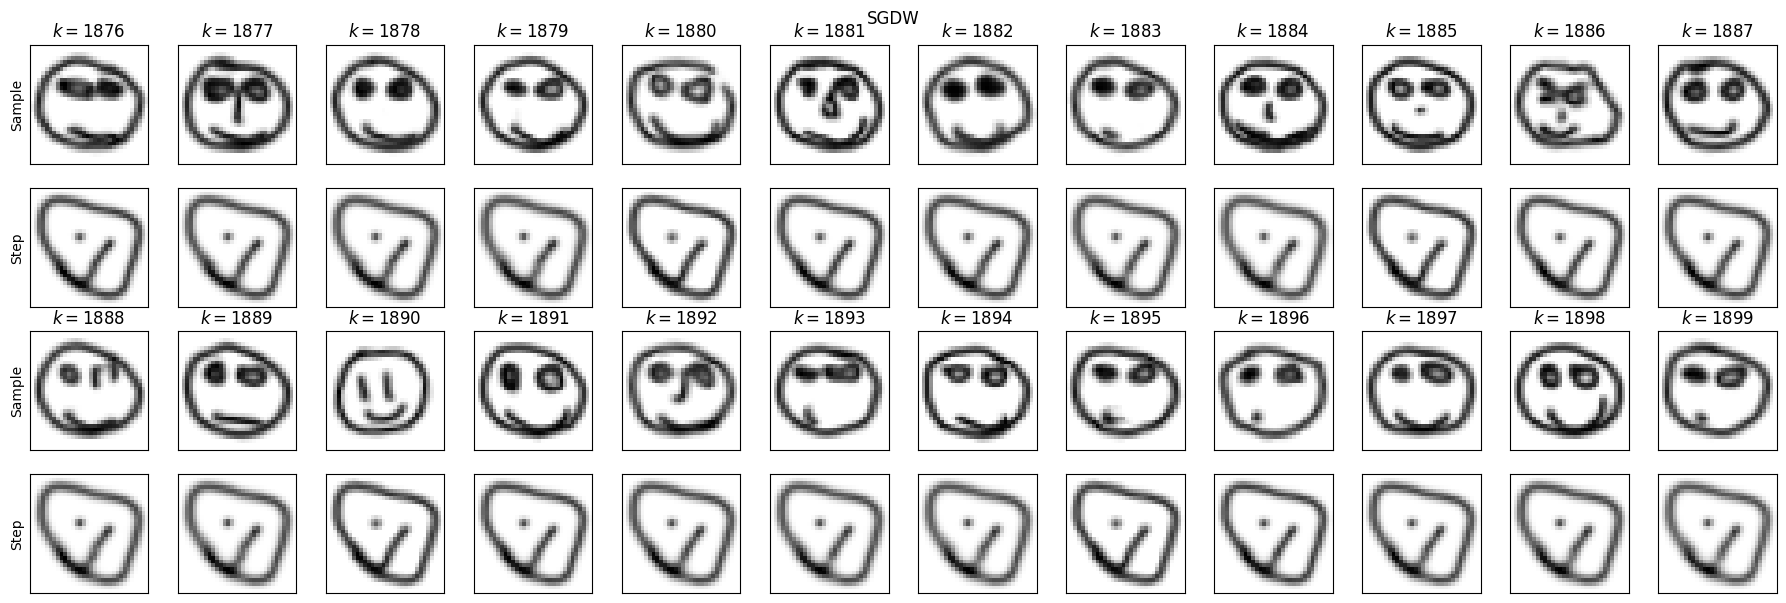

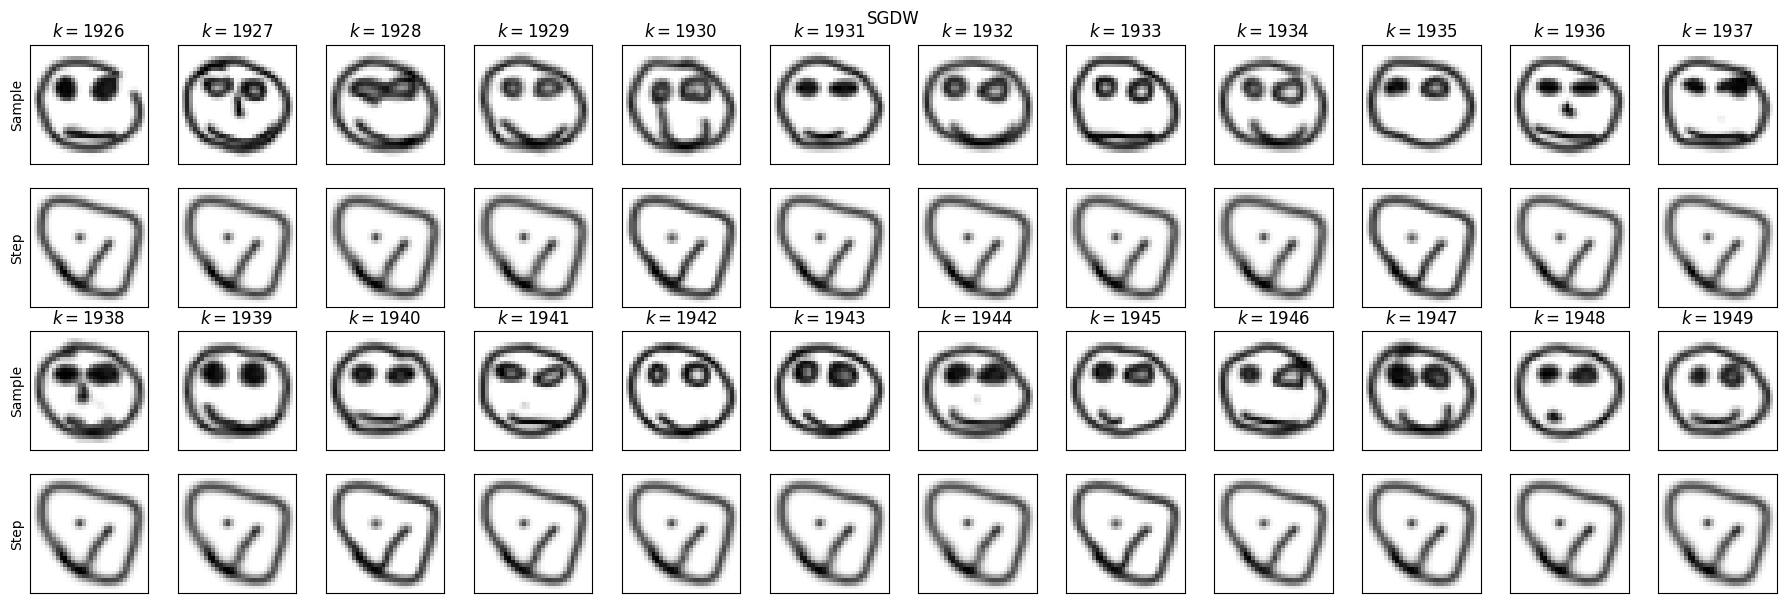

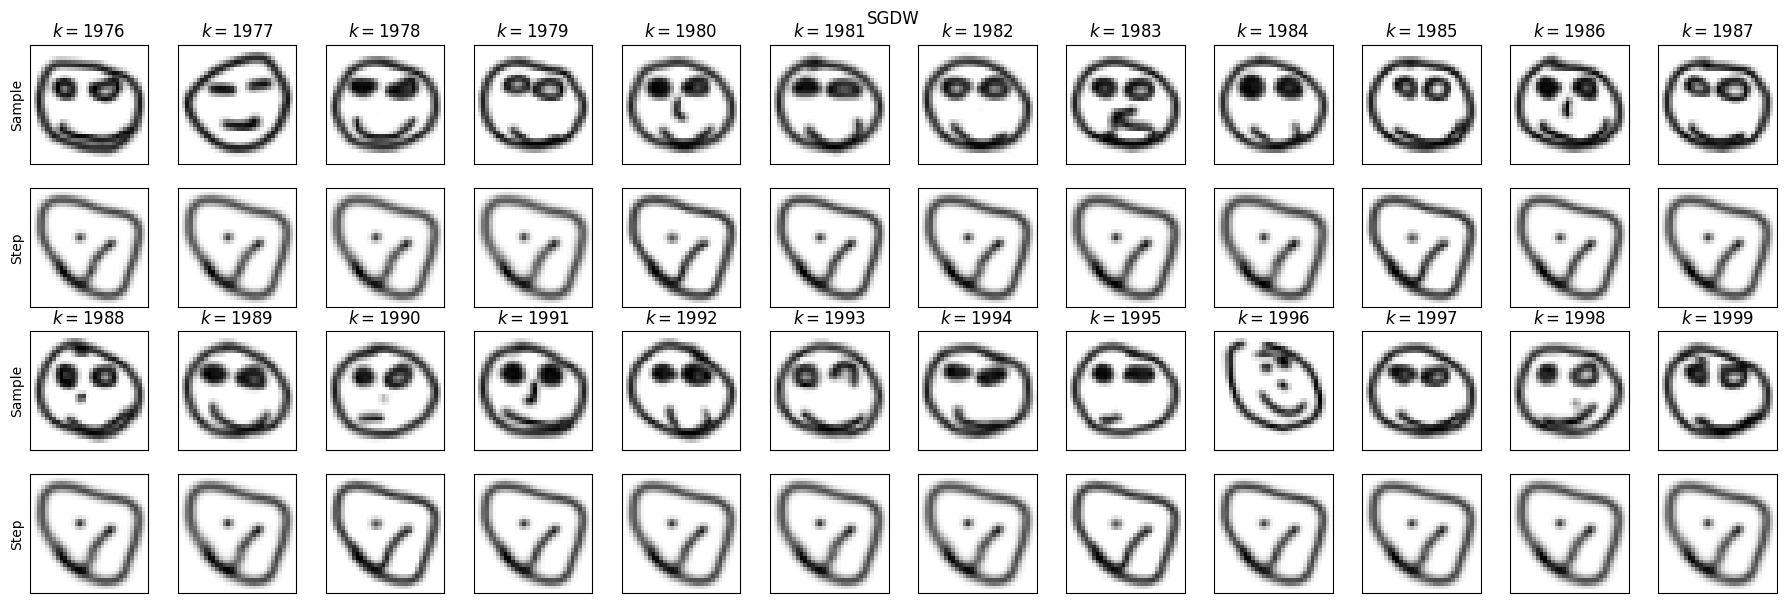

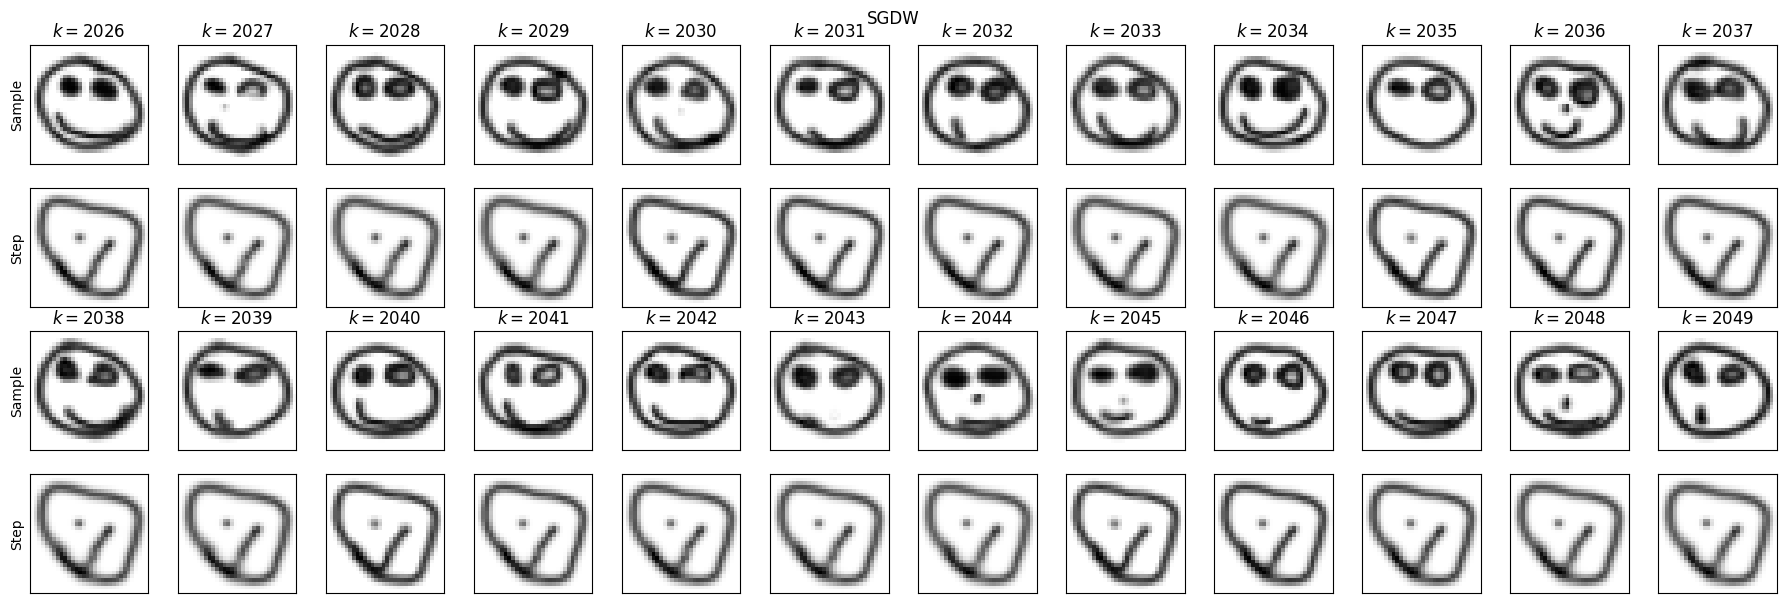

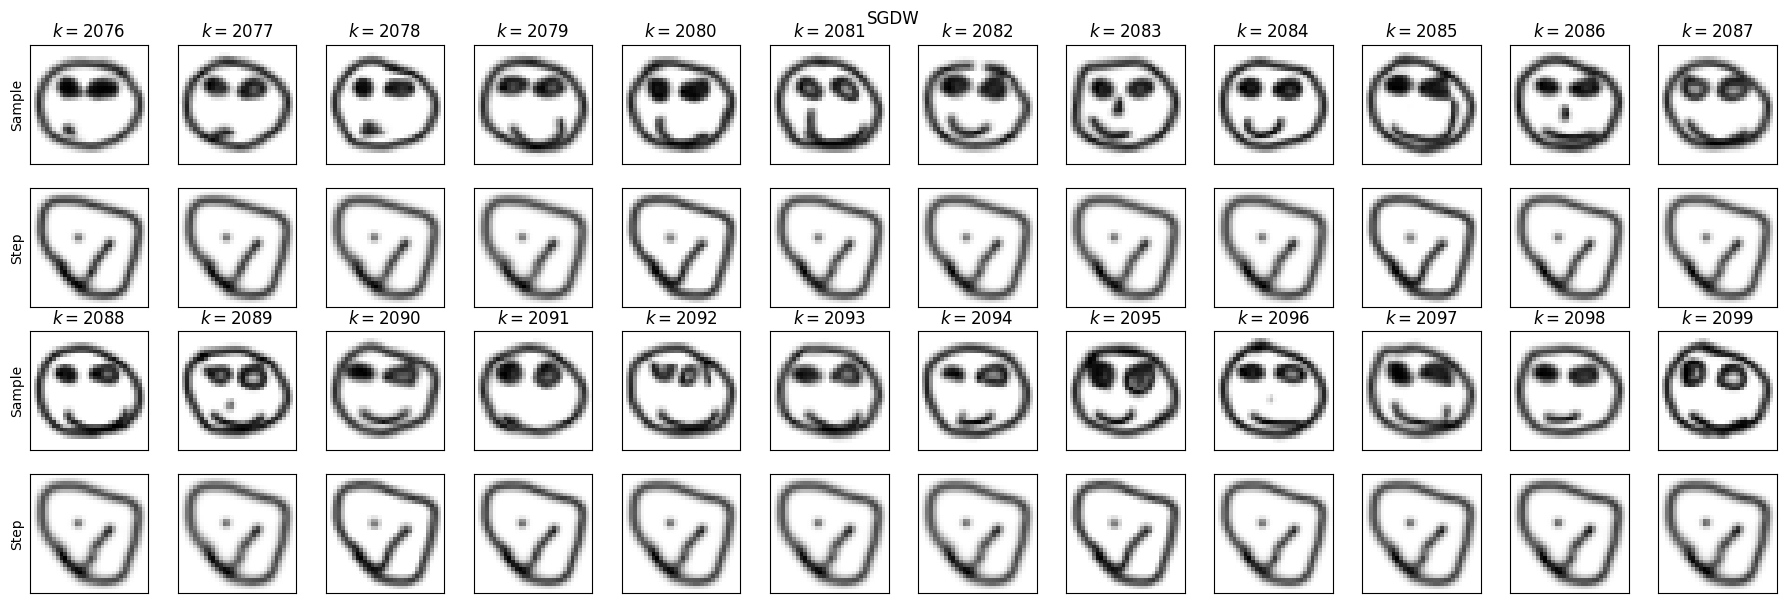

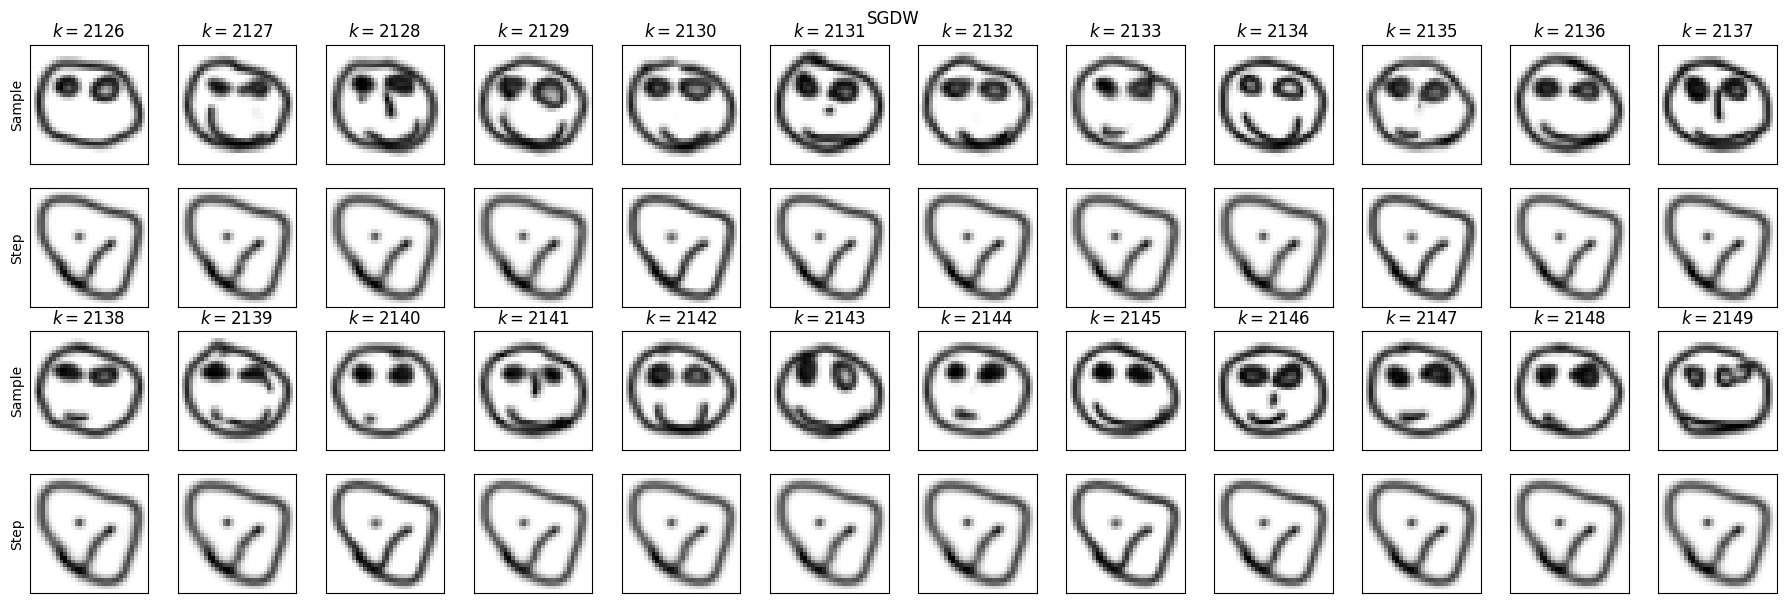

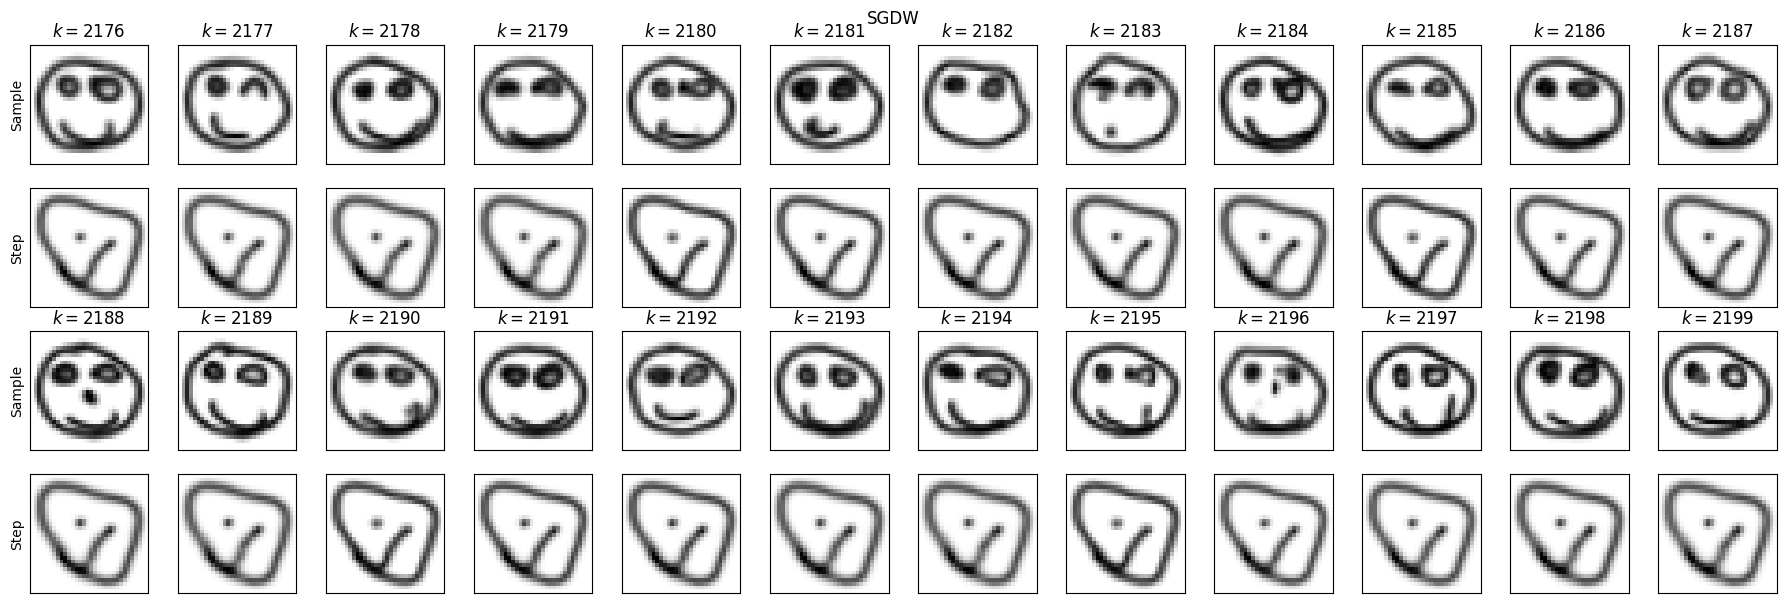

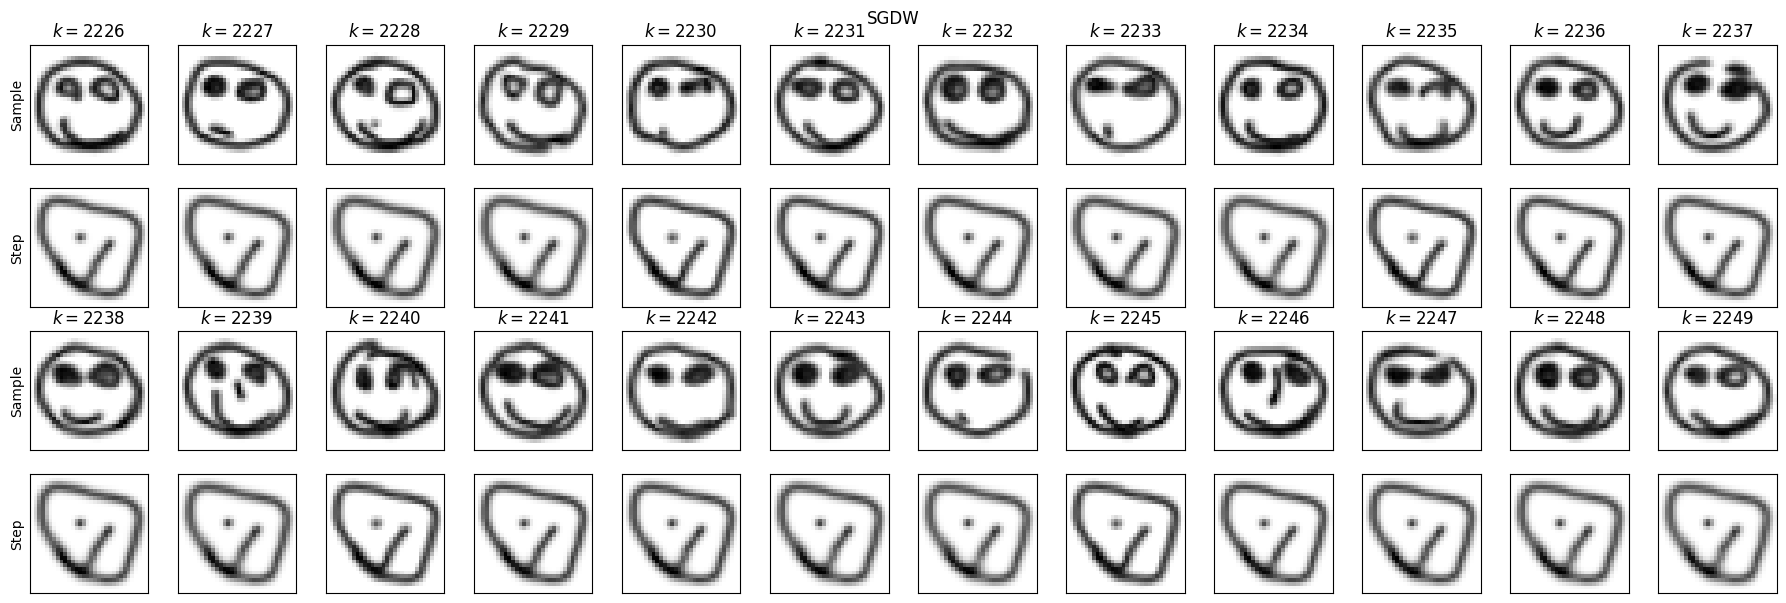

In [69]:
import bwb.sgdw.sgdw as sgdw
from bwb.sgdw.utils import gamma
from bwb.sgdw.plotters import PlotterComparison

dist_draw_sgdw = sgdw.DebiesedDistributionDrawSGDW(
    distr_sampler=post_pi_n,
    step_scheduler=gamma(a=0.5, b=0.51, c=0.51),
    projector=proj,
    proj_every=5,
    max_iter=len(post_pi_n.samples_cache)-5,
    report_every=10,
).set_geodesic_params(
    reg=0.01,
    stop_thr=1e-3,
)

plotter_comp = PlotterComparison(
    dist_draw_sgdw,
    plot_every=50,
    n_cols=12,
    n_rows=2,
    cmap="binary_r"
)

bar = plotter_comp.run(
    include_dict=dict(total_time=True),
)

In [ ]:
plotter_comp.plot(2000)

In [ ]:
# max_images = 36
# plotters.plot_list_of_images(post_pi_n.rvs(max_images))
# bwb_utils.plot_list_of_draws(post_pi_n.rvs(max_images), max_images=max_images)

TypeError: Image.transpose() missing 1 required positional argument: 'method'

### Experimentos

In [ ]:
post_pi_n_dict = {}
times_autocorr = {}
total_times = {}

In [ ]:
burn = 400
num_samples = 15_000

In [ ]:
bar = "=" * 10

for step_p_sample in [1, 2, 3]:
    post_pi_n_dict[step_p_sample] = {}
    times_autocorr[step_p_sample] = {}
    total_times[step_p_sample] = {}

    for n_data in [5, 50, 100]:
        post_pi_n_dict[step_p_sample][n_data] = {}
        times_autocorr[step_p_sample][n_data] = {}
        total_times[step_p_sample][n_data] = {}

        for desired_acc_rate in [0.3, 0.6]:
            print(bar + f" {step_p_sample = }, {n_data = }, {desired_acc_rate = } " + bar)
            post_pi_n = NUTSPosteriorPiN(
                n_walkers=8,
                num_steps_per_sample=step_p_sample,
                burn=burn,
                desired_accept_rate=desired_acc_rate,
            )
            post_pi_n.fit(data[:n_data], G, transform_out)
            post_pi_n.run(num_samples=num_samples)

            mean_autocorr_time = int(post_pi_n.get_autocorr_time().mean())
            total_time = post_pi_n.total_time

            post_pi_n_dict[step_p_sample][n_data][desired_acc_rate] = post_pi_n
            times_autocorr[step_p_sample][n_data][desired_acc_rate] = mean_autocorr_time
            total_times[step_p_sample][n_data][desired_acc_rate] = total_time

            print(post_pi_n)
            print(f"{mean_autocorr_time = }")
            print(f"{total_time = }")
            print()


Se demoró 13.85 horas en correr la celda anterior.

In [ ]:
for n_data in [5, 50, 100]:
    for desired_acc_rate in [0.6, 0.3]:
        for step_p_sample in [1, 2, 3]:
            print(bar + f" {step_p_sample = }, {n_data = }, {desired_acc_rate = } " + bar)
            # print(post_pi_n_dict[step_p_sample][n_data][desired_acc_rate])
            print(f"autocorr time: {times_autocorr[step_p_sample][n_data][desired_acc_rate]}")
            print(f"time spend: {total_times[step_p_sample][n_data][desired_acc_rate] / 60:.2f} mins")
            print()
        print()
    print(bar * 8 + "\n")

Aquí tomamos aquellas cadenas que tuvieron un tiempo de autocorrelación menor.

In [ ]:
post_pi_n_5 = post_pi_n_dict[1][5][0.3]
post_pi_n_50 = post_pi_n_dict[2][50][0.3]
post_pi_n_100 = post_pi_n_dict[3][100][0.3]

Obtenemos sus tiempos de autocorrelación promedios

In [ ]:
mean_autocorr_time_n_5 = int(post_pi_n_5.get_autocorr_time().mean())
print(f"{mean_autocorr_time_n_5 = }")

mean_autocorr_time_n_50 = int(post_pi_n_50.get_autocorr_time().mean())
print(f"{mean_autocorr_time_n_50 = }")

mean_autocorr_time_n_100 = int(post_pi_n_100.get_autocorr_time().mean())
print(f"{mean_autocorr_time_n_100 = }")

Ahora haremos muestreos utilizando el tiempo de autocorrelación por cada cadena.

In [ ]:
post_pi_n_5.shuffle_samples_cache(thin=mean_autocorr_time_n_5)

In [ ]:
post_pi_n_50.shuffle_samples_cache(thin=mean_autocorr_time_n_50)

In [ ]:
post_pi_n_100.shuffle_samples_cache(thin=mean_autocorr_time_n_100)

Y visualizaremos los resultados.

In [ ]:
max_images = 4 * 16
bwb_utils.plot_list_of_draws(post_pi_n_5.rvs(max_images), max_images=max_images)

In [ ]:
bwb_utils.plot_list_of_draws(post_pi_n_50.rvs(max_images), max_images=max_images)

In [ ]:
bwb_utils.plot_list_of_draws(post_pi_n_100.rvs(max_images), max_images=max_images)

In [ ]:
face0

## Hamiltonian Monte Carlo (HMC)

In [ ]:
class HMCPosteriorPiN(LatentMCMCPosteriorPiN):
    def __init__(
        self,
        log_prob_fn=_log_posterior,
        num_samples=10,
        num_steps_per_sample=5,
        burn=10,
        step_size=0.1,
        **kwargs
    ) -> None:
        super().__init__(
            log_prob_fn=log_prob_fn,
            num_samples=num_samples,
            num_steps_per_sample=num_steps_per_sample,
            burn=burn,
            step_size=step_size,
            sampler=Sampler.HMC,
            **kwargs
        )


post_pi_n = HMCPosteriorPiN()
post_pi_n.fit(data[:5], G, transform_out)

max_images = 4 * 9
post_pi_n.reset_samples().run(num_samples=max_images)

bwb_utils.plot_list_of_draws(post_pi_n.rvs(max_images), max_images=max_images)

print(post_pi_n)
print(post_pi_n.total_time)

## Riemannian Manifold Hamiltonian Monte Carlo (RMHMC)

In [ ]:
class RMHMCPosteriorPiN(LatentMCMCPosteriorPiN):
    def __init__(
        self,
        log_prob_fn=_log_posterior,
        num_samples=10,
        num_steps_per_sample=5,
        burn=10,
        step_size=0.1,
        fixed_point_max_iterations=1000,
        fixed_point_threshold=1e-5,
        explicit_binding_const=100,
        integrator=Integrator.IMPLICIT,
        metric=Metric.HESSIAN,
        **kwargs
    ) -> None:
        super().__init__(
            log_prob_fn=log_prob_fn,
            num_samples=num_samples,
            num_steps_per_sample=num_steps_per_sample,
            burn=burn,
            step_size=step_size,
            fixed_point_max_iterations=fixed_point_max_iterations,
            fixed_point_threshold=fixed_point_threshold,
            explicit_binding_const=explicit_binding_const,
            sampler=Sampler.RMHMC,
            integrator=integrator,
            metric=metric,
            **kwargs
        )

    def _additional_repr_(self, sep):
        to_return = super()._additional_repr_(sep)
        to_return += f"metric={self.hamiltorch_kwargs['metric'].name}" + sep
        return to_return


post_pi_n = RMHMCPosteriorPiN(step_size=0.1)
post_pi_n

### Implicit RMHMC

In [ ]:
class ImplicitRMHMCPosteriorPiN(RMHMCPosteriorPiN):
    def __init__(
        self,
        log_prob_fn=_log_posterior,
        num_samples=10,
        num_steps_per_sample=10,
        burn=10,
        step_size=0.1,
        fixed_point_max_iterations=1000,
        fixed_point_threshold=1e-5,
        metric=Metric.HESSIAN,
        **kwargs
    ) -> None:
        super().__init__(
            log_prob_fn=log_prob_fn,
            num_samples=num_samples,
            num_steps_per_sample=num_steps_per_sample,
            burn=burn,
            step_size=step_size,
            integrator=Integrator.IMPLICIT,
            metric=metric,
            fixed_point_max_iterations=fixed_point_max_iterations,
            fixed_point_threshold=fixed_point_threshold,
            **kwargs
        )

    def _additional_repr_(self, sep):
        to_return = super()._additional_repr_(sep)
        to_return += f"fixed_point_max_iterations={self.hamiltorch_kwargs['fixed_point_max_iterations']}" + sep
        to_return += f"fixed_point_threshold={self.hamiltorch_kwargs['fixed_point_threshold']}" + sep
        return to_return


post_pi_n = ImplicitRMHMCPosteriorPiN(num_steps_per_sample=1)
post_pi_n.fit(data[:5], G, transform_out)

max_images = 4 * 9
num_samples = max_images
post_pi_n.reset_samples().run(num_samples=num_samples)

bwb_utils.plot_list_of_draws(post_pi_n.rvs(max_images), max_images=max_images)

print(post_pi_n)
print(post_pi_n.total_time)

### Explicit RMHMC

In [ ]:
class ExplicitRMHMCPosteriorPiN(RMHMCPosteriorPiN):
    def __init__(
        self,
        log_prob_fn=_log_posterior,
        num_samples=10,
        num_steps_per_sample=10,
        burn=10,
        step_size=0.1,
        explicit_binding_const=100,
        metric=Metric.HESSIAN,
        **kwargs
    ) -> None:
        super().__init__(
            log_prob_fn=log_prob_fn,
            num_samples=num_samples,
            num_steps_per_sample=num_steps_per_sample,
            burn=burn,
            step_size=step_size,
            integrator=Integrator.EXPLICIT,
            metric=metric,
            explicit_binding_const=explicit_binding_const,
            **kwargs
        )

    def _additional_repr_(self, sep):
        to_return = super()._additional_repr_(sep)
        to_return += f"explicit_binding_const={self.hamiltorch_kwargs['explicit_binding_const']}" + sep
        return to_return


post_pi_n = ExplicitRMHMCPosteriorPiN()
post_pi_n.fit(data[:5], G, transform_out)

max_images = 4 * 9
post_pi_n.reset_samples().run(num_samples=max_images)

bwb_utils.plot_list_of_draws(post_pi_n.rvs(max_images), max_images=max_images)

print(post_pi_n)
print(post_pi_n.total_time)

# Experimentos

In [ ]:
import traceback


def mcmc_experiment(data, num_steps_per_sample, burn=50, G=G, transform_out=transform_out, max_images=4 * 9):
    try:
        post_pi_n = NUTSPosteriorPiN(burn=burn, num_steps_per_sample=num_steps_per_sample, desired_accept_rate=0.3)
        post_pi_n.fit(data, G, transform_out)

        post_pi_n.reset_samples().run(num_samples=max_images)

        bwb_utils.plot_list_of_draws(post_pi_n.rvs(max_images), max_images=max_images)

        print(f"{post_pi_n = }")
        print(f"{post_pi_n.total_time = :.4f}")
    except:
        traceback.print_exc()

## Num steps per sample = 10

In [ ]:
num_steps_ps = 10

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

---

## Num steps per sample = 50

In [ ]:
num_steps_ps = 50

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

---

## Num steps per sample = 100

In [ ]:
num_steps_ps = 100

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

---

## Num steps per sample = 500

In [ ]:
num_steps_ps = 500

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps)

---

## Num steps per sample = 1.000

In [ ]:
num_steps_ps = 1_000
burn = 20

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

---

## Num steps per sample = 10.000

In [ ]:
num_steps_ps = 10_000
burn = 10

### N Data = 5

In [ ]:
n_data = 5
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 10

In [ ]:
n_data = 10
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 25

In [ ]:
n_data = 25
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)

### N Data = 50

In [ ]:
n_data = 50
mcmc_experiment(data[:n_data], num_steps_per_sample=num_steps_ps, burn=burn)